___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (streamlit api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib==3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 3.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


✅ We defined our libraries

In [3]:
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import math
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.figure_factory as ff

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from xgboost import plot_importance
from sklearn.feature_extraction.text import TfidfVectorizer
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline

In [5]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

✅ **We have coded 3 functions to easily see some information about our dataset**

* **missing_values:** We can use this function to check if we have missing values in the dataset.
* **first_looking:** We can take a quick look at the dataset.
* **summary:** We can check just a feature.
* **histogram_boxplot:** We can plot our features to see their distiribution with histogram and boxplot techniques

In [6]:
## Some Useful User-Defined-Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", 'yellow', attrs=['bold']), df.shape,'\n', 
          colored('*'*100, 'red', attrs=['bold']),
          colored("\nInfo:\n",'yellow', attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", 'yellow', attrs=['bold']), df.nunique(),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", 'yellow', attrs=['bold']), missing_values(df),'\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", 'yellow', attrs=['bold']), *list(df.columns), sep='\n- ') 
    print(colored('*'*100, 'red', attrs=['bold']), sep='')

################################################################################

def summary(column):
    print(colored("Column: ",'yellow', attrs=['bold']), column)
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values: ", 'yellow', attrs=['bold']), df[column].isnull().sum())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values(%): ", 'yellow', attrs=['bold']), round(df[column].isnull().sum()/df.shape[0]*100, 2))
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Unique values: ", 'yellow', attrs=['bold']), df[column].nunique())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Value counts: \n", 'yellow', attrs=['bold']), df[column].value_counts(dropna = False), sep='')
    print(colored('*'*100, 'red', attrs=['bold']), sep='')

In [7]:
def histogram_boxplot(feature, figsize=(12,6), bins=None):
    f,(ax_box,ax_hist)=plt.subplots(nrows=2,sharex=True, gridspec_kw={'height_ratios':(.1,.75)},figsize=figsize)                                  
                                                                                                   
    sns.distplot(feature,kde=True,ax=ax_hist,bins=bins) 
    feature.plot.box(vert=False, ax=ax_box,color="Red")
    #sns.boxplot(feature,ax=ax_box, color='Red')
    ax_hist.axvline(np.mean(feature),color='g',linestyle='-')
    ax_hist.axvline(np.median(feature),color='y',linestyle='--')

**Load Data**

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
df_org = pd.read_csv("/content/drive/MyDrive/data/creditcard1.csv")

In [ ]:
#df_org = pd.read_csv("creditcard1.csv")

✅ **We dropped dublicate entries**

Additionally, duplicate entries can ruin the split between train, validation and test sets in cases where identical entries are not all in the same set. This can lead to biased performance estimates that will lead to disappointing models in production.

**Additional Resource:** 
* https://towardsdatascience.com/how-to-drop-duplicates-in-pandas-b1d4a5f4d2c6
* https://deepchecks.com/what-is-data-cleaning/

In [12]:
df_org = df_org.drop_duplicates()
df = df_org.copy()

✅ We used **first_looking** func to check our dataset.

In [13]:
first_looking(df)

Shape:(283726, 31)
****************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 1

✅ We converted all column names to lowercase.
In this way, it provides us with ease of writing.

In [14]:
df.columns = df.columns.str.lower()

---
---


### Exploratory Data Analysis

**We used describe built-in function in pandas**\
The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values.

**Additional Resource:**
* https://www.machinelearningplus.com/pandas/pandas-describe
* https://www.w3schools.com/python/pandas/ref_df_describe.asp

In [15]:
df.describe().T

count          mean           std         min           25%  \
time    283726.0  94811.077600  47481.047891    0.000000  54204.750000   
v1      283726.0      0.005917      1.948026  -56.407510     -0.915951   
v2      283726.0     -0.004135      1.646703  -72.715728     -0.600321   
v3      283726.0      0.001613      1.508682  -48.325589     -0.889682   
v4      283726.0     -0.002966      1.414184   -5.683171     -0.850134   
v5      283726.0      0.001828      1.377008 -113.743307     -0.689830   
v6      283726.0     -0.001139      1.331931  -26.160506     -0.769031   
v7      283726.0      0.001801      1.227664  -43.557242     -0.552509   
v8      283726.0     -0.000854      1.179054  -73.216718     -0.208828   
v9      283726.0     -0.001596      1.095492  -13.434066     -0.644221   
v10     283726.0     -0.001441      1.076407  -24.588262     -0.535578   
v11     283726.0      0.000202      1.018720   -4.797473     -0.761649   
v12     283726.0     -0.000715      0.994674  -18.683715     -0.406198   
v13     283726.0      0.000603      0.995430   -5.791881     -0.647862   
v14     283726.0      0.000252      0.952215  -19.214325     -0.425732   
v15     283726.0      0.001043      0.914894   -4.498945     -0.581452   
v16     283726.0      0.001162      0.873696  -14.129855     -0.466860   
v17     283726.0      0.000170      0.842507  -25.162799     -0.483928   
v18     283726.0      0.001515      0.837378   -9.498746     -0.498014   
v19     283726.0     -0.000264      0.813379   -7.213527     -0.456289   
v20     283726.0      0.000187      0.769984  -54.497720     -0.211469   
v21     283726.0     -0.000371      0.723909  -34.830382     -0.228305   
v22     283726.0     -0.000015      0.724550  -10.933144     -0.542700   
v23     283726.0      0.000198      0.623702  -44.807735     -0.161703   
v24     283726.0      0.000214      0.605627   -2.836627     -0.354453   
v25     283726.0     -0.000232      0.521220  -10.295397     -0.317485   
v26     283726.0      0.000149      0.482053   -2.604551     -0.326763   
v27     283726.0      0.001763      0.395744  -22.565679     -0.070641   
v28     283726.0      0.000547      0.328027  -15.430084     -0.052818   
amount  283726.0     88.472687    250.399437    0.000000      5.600000   
class   283726.0      0.001667      0.040796    0.000000      0.000000   

                 50%            75%            max  
time    84692.500000  139298.000000  172792.000000  
v1          0.020384       1.316068       2.454930  
v2          0.063949       0.800283      22.057729  
v3          0.179963       1.026960       9.382558  
v4         -0.022248       0.739647      16.875344  
v5         -0.053468       0.612218      34.801666  
v6         -0.275168       0.396792      73.301626  
v7          0.040859       0.570474     120.589494  
v8          0.021898       0.325704      20.007208  
v9         -0.052596       0.595977      15.594995  
v10        -0.093237       0.453619      23.745136  
v11        -0.032306       0.739579      12.018913  
v12         0.139072       0.616976       7.848392  
v13        -0.012927       0.663178       7.126883  
v14         0.050209       0.492336      10.526766  
v15         0.049299       0.650104       8.877742  
v16         0.067119       0.523512      17.315112  
v17        -0.065867       0.398972       9.253526  
v18        -0.002142       0.501956       5.041069  
v19         0.003367       0.458508       5.591971  
v20        -0.062353       0.133207      39.420904  
v21        -0.029441       0.186194      27.202839  
v22         0.006675       0.528245      10.503090  
v23        -0.011159       0.147748      22.528412  
v24         0.041016       0.439738       4.584549  
v25         0.016278       0.350667       7.519589  
v26        -0.052172       0.240261       3.517346  
v27         0.001479       0.091208      31.612198  
v28         0.011288       0.078276      33.847808  
amount     22.000000      77.510000   25691.160000  

**Target Value**

**We checked our dependent feature**\
As you see that value count of **1** is very less according to **0**. It means that our dataset is **imbalanced**. 1 represent **Fraud** and 0 is **No Fraud**. This situation is quite natural for Fraud Detection studies.

**Additional Research:** 
* https://towardsdatascience.com/extremely-imbalanced-data-fraud-detection-a5cc989fd897
* https://medium.com/analytics-vidhya/credit-card-fraud-detection-how-to-handle-imbalanced-dataset-1f18b6f881

In [16]:
df["class"].value_counts()

0    283253
1       473
Name: class, dtype: int64

In [17]:
px.pie(df["class"].value_counts(),
       names=df["class"].value_counts().index,
       values=df["class"].value_counts().values, 
       title='class',
      width=400, height=400,
      color_discrete_sequence= px.colors.qualitative.Pastel1)

*This dataset is very heavily imbalanced. Only 0.167% of target is fraud.* 

**Feature Boxplots**

**We take a quick look at the distribution of our features to get a general idea.**

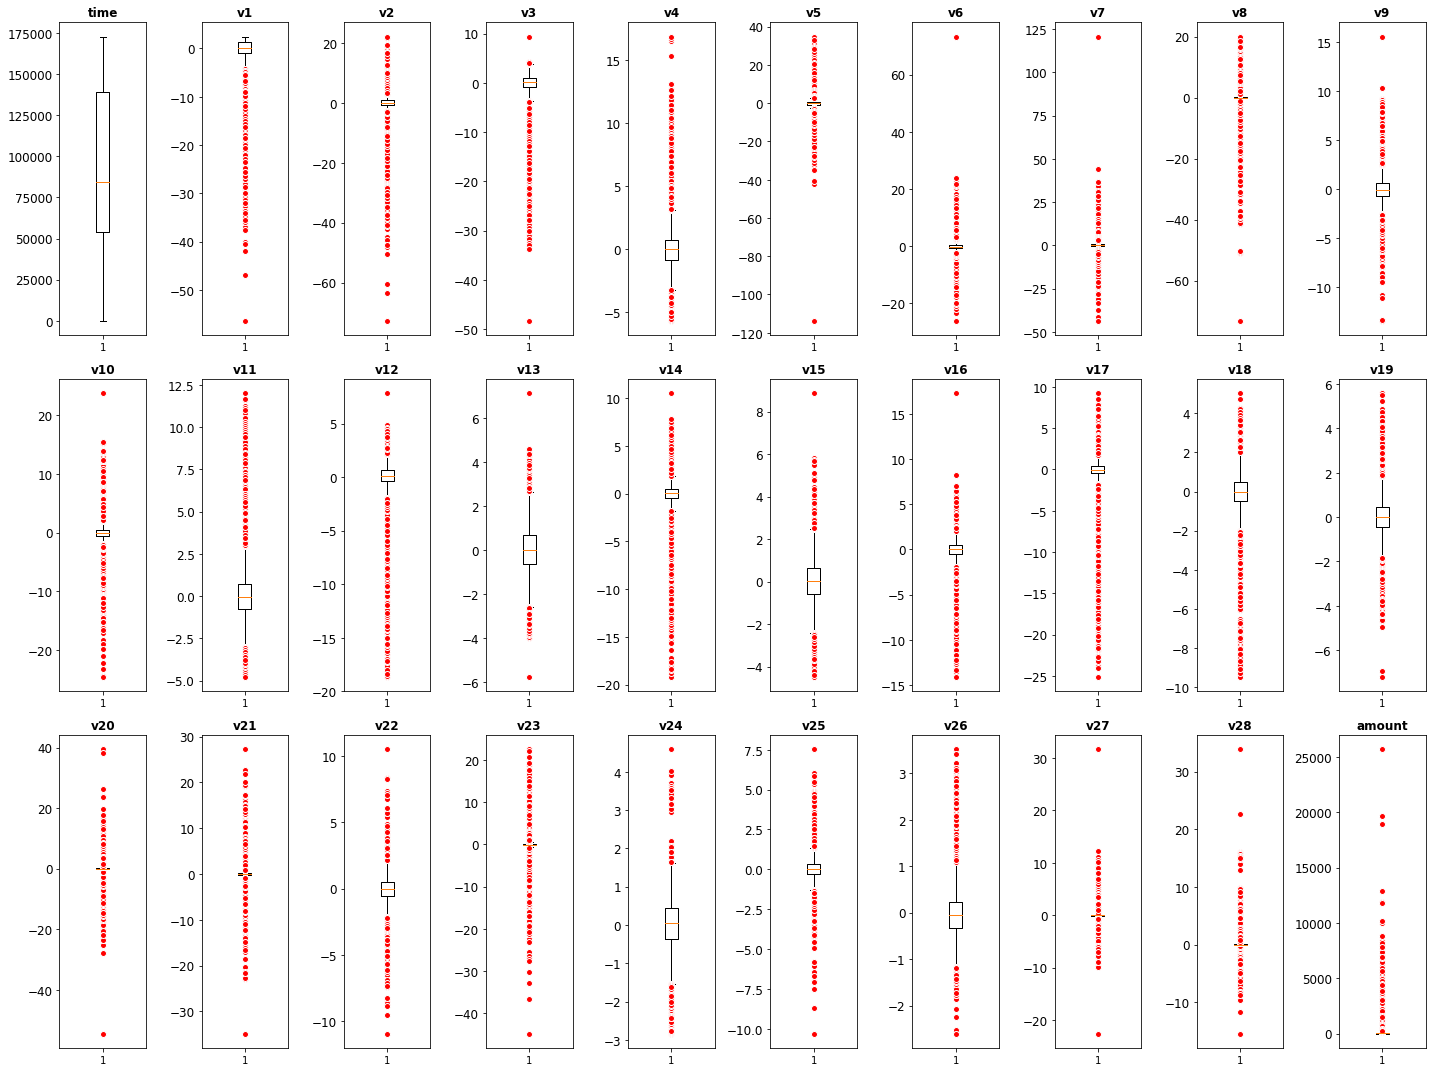

In [18]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
df_box = df.iloc[:,:-1]

fig, axs = plt.subplots(3,10, figsize=(20,15))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_box.iloc[:,i], flierprops=red_circle)
    ax.set_title(df_box.columns[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
    
plt.tight_layout()

### Data Cleaning
Check Missing Values and Outliers

* There is no missing value in the data. 
* Two strategies were followed while cleaning outliers in the data. 
* One of them is to clean only the extreme outliers. 
* The other is to clear all the outliers except that the target is 1 in the outliers.
* Two different dataframes will be created according to the strategies.
* The dataframe from which all the outliers are dropped will be named df_o. Later, when creating models, they will be named train_o and test_o.

Now it's time to warm our hands :)\
We basically have two strategies for Outliers.

**Strategy 1:** We look at each feature one by one and manually delete over or under a certain value.

**Strategy 2:** This is a slightly more complex point of view than our first strategy. Because with the function we created, we delete outliers to certain groups, but we only delete outliers that are 0, not 1 that are already less. We have two main reasons for this. First of all, Fraud class is very less and we can't lose our data, which is Fraud. Second, Fraud rate is high in outliers. If we leave Fraud alone in outliers the results of model can be better than the first case.

> Girintili blok



**Additional Resource for Outliers:**
* https://towardsdatascience.com/how-to-detect-outliers-in-a-data-science-project-17f39653fb17
* https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* https://www.analyticsvidhya.com/blog/2021/03/zooming-out-a-look-at-outlier-and-how-to-deal-with-them-indata-science/

**Additional Resource for Fraud Cases:**
* https://quanam.com/en/fraud-detection-and-prevention-what-is-data-sciences-role/
* https://www.henryharvin.com/blog/usage-of-data-science-in-fraud-detection/
* https://en.wikipedia.org/wiki/Data_analysis_techniques_for_fraud_detection

**Strategy 1**

**v1**

In [19]:
df[df.v1<-45]

time         v1         v2         v3         v4         v5  \
39769    39954.0 -56.407510 -72.715728  -6.605265  16.491217  34.801666   
220212  142071.0 -46.855047 -45.607973 -18.320903  13.129143   0.775717   

               v6         v7        v8        v9  ...       v21       v22  \
39769  -26.160506 -19.399981 -1.501300  6.967698  ... -6.266878 -1.272167   
220212  -2.695834   1.087461 -4.241002  6.645063  ... -7.852711 -5.302749   

              v23       v24       v25       v26       v27        v28   amount  \
39769    7.893082  0.767805  5.376595  0.163672 -8.358317  33.847808  1201.83   
220212 -27.533643  2.023816 -3.856097 -0.478302 -4.139269  13.999688   303.80   

        class  
39769       0  
220212      0  

[2 rows x 31 columns]

In [20]:
df.drop(df[df.v1<-45].index, inplace=True)

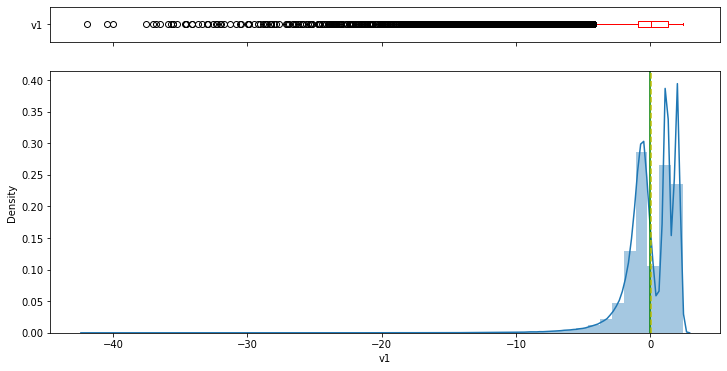

In [21]:
histogram_boxplot(df.v1, bins=50)

In [22]:
fig = px.histogram(df, x="v1",
                   marginal="box", # or violin, rug
                   hover_data=df.columns,
                   width=800, height=400,
                   title="Age",
                   color_discrete_sequence = ['#2BCDC1'],
                  nbins=100)
fig.show()

**v2**

In [23]:
df[df.v2<-58]

In [ ]:
df.drop(df[df.v2<-58].index, inplace=True)

In [ ]:
df[(df.v2<-6) | (df.v2>6)]["class"].value_counts()

In [ ]:
histogram_boxplot(df.v2, bins=50)

**v3**

In [27]:
df[df.v3<-40]

time         v1         v2         v3         v4          v5  \
274771  166198.0 -35.548539 -31.850484 -48.325589  15.304184 -113.743307   

               v6          v7        v8        v9  ...       v21       v22  \
274771  73.301626  120.589494 -27.34736 -3.872425  ... -21.62012  5.712303   

             v23       v24       v25       v26        v27        v28  \
274771 -1.581098  4.584549  4.554683  3.415636  31.612198 -15.430084   

          amount  class  
274771  25691.16      0  

[1 rows x 31 columns]

In [28]:
df.drop(df[df.v3<-40].index, inplace=True)

In [29]:
df[((df.v3<-6) | (df.v3>6))].shape

(936, 31)

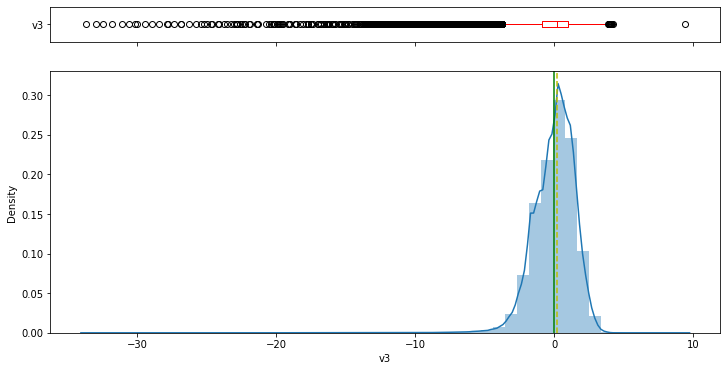

In [30]:
histogram_boxplot(df.v3, bins=50)

**v4**

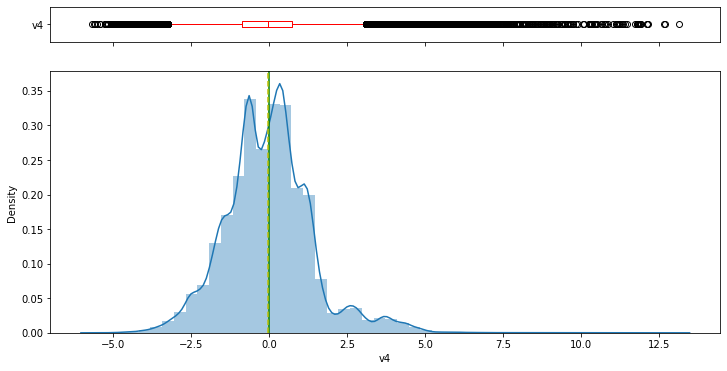

In [31]:
histogram_boxplot(df.v4, bins=50)

**v5**




In [32]:
df[df["v5"]<-50]

Empty DataFrame
Columns: [time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, amount, class]
Index: []

[0 rows x 31 columns]

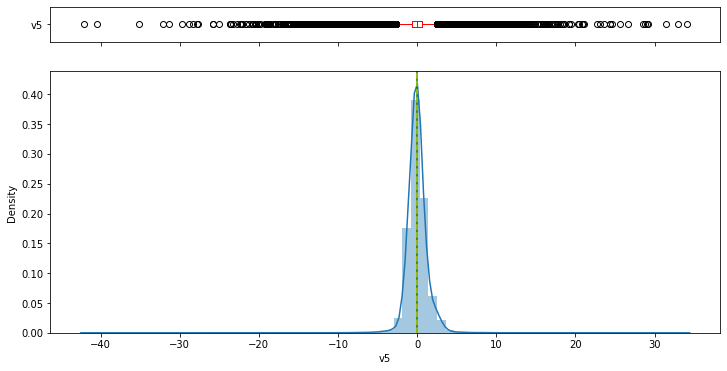

In [33]:
histogram_boxplot(df.v5, bins=70)

**v6**




In [34]:
df[df["v6"]>40]

Empty DataFrame
Columns: [time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, amount, class]
Index: []

[0 rows x 31 columns]

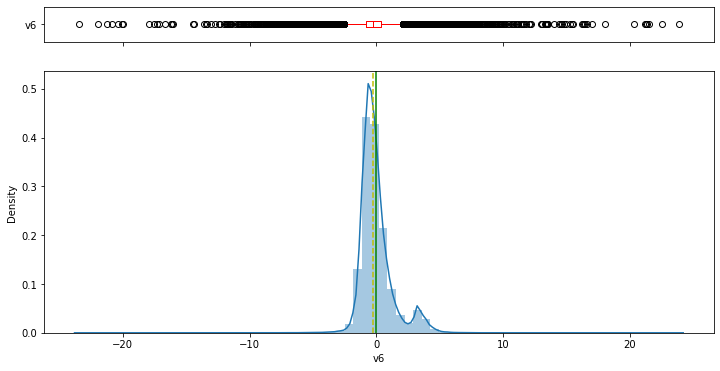

In [35]:
histogram_boxplot(df.v6, bins=70)

**v7**

In [36]:
df[df.v7>50]

Empty DataFrame
Columns: [time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, amount, class]
Index: []

[0 rows x 31 columns]

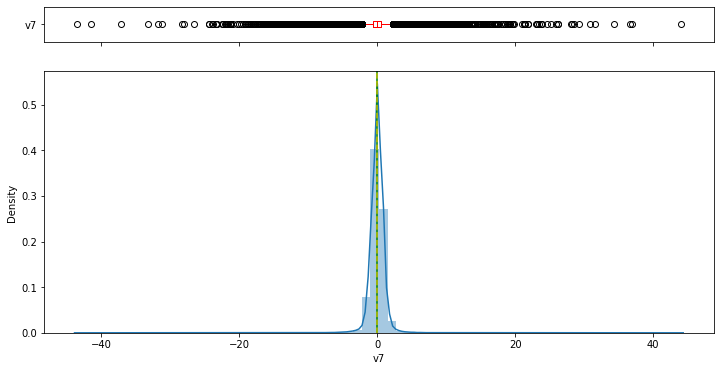

In [37]:
histogram_boxplot(df.v7, bins=70)

**v8**

In [38]:
df[df.v8<-55]

time        v1        v2        v3        v4        v5         v6  \
65423  51575.0 -14.90434  12.79388 -7.888739  0.512373 -7.661829  16.614054   

              v7         v8       v9  ...        v21       v22       v23  \
65423 -31.764946 -73.216718 -6.29073  ... -34.830382  10.50309  4.245073   

            v24       v25       v26      v27       v28  amount  class  
65423 -1.412813 -0.730374  0.133557 -0.39437  0.942177   500.0      0  

[1 rows x 31 columns]

In [39]:
df.drop(df[df.v8<-55].index, inplace=True)

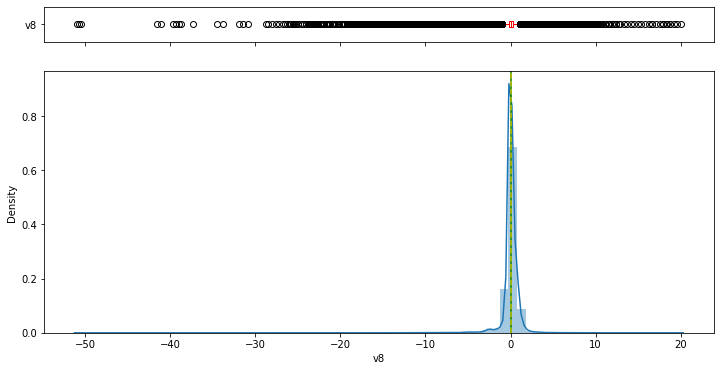

In [40]:
histogram_boxplot(df.v8, bins=70)

**v9**

In [41]:
df[df.v9>11]

time        v1        v2        v3        v4        v5       v6  \
118764  75207.0 -3.432602 -3.110123  9.382558 -1.218808  7.515238  3.39954   

               v7         v8         v9  ...       v21       v22       v23  \
118764  15.661716 -18.958017  15.594995  ... -3.177153  2.766917 -2.971359   

             v24       v25       v26        v27        v28  amount  class  
118764  0.539097 -3.963454 -2.068561 -22.565679 -11.710896  243.26      0  

[1 rows x 31 columns]

In [42]:
df.drop(df[df.v9>11].index, inplace=True)

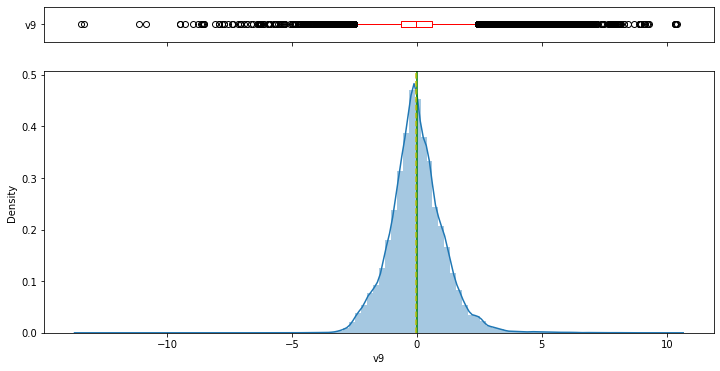

In [43]:
histogram_boxplot(df.v9, bins=100)

**v10**

In [44]:
df[df.v10>20]

Empty DataFrame
Columns: [time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, amount, class]
Index: []

[0 rows x 31 columns]

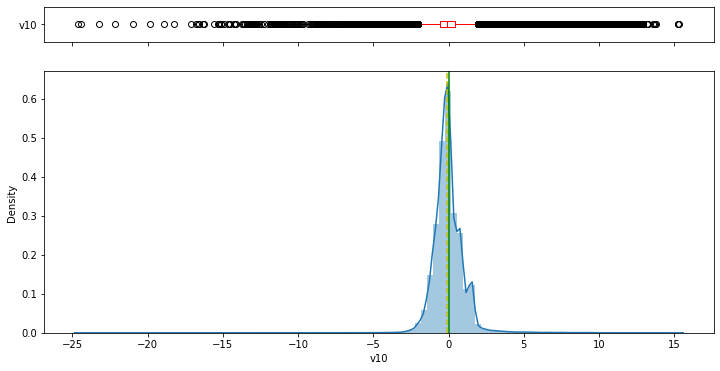

In [45]:
histogram_boxplot(df.v10, bins=100)

**v11**

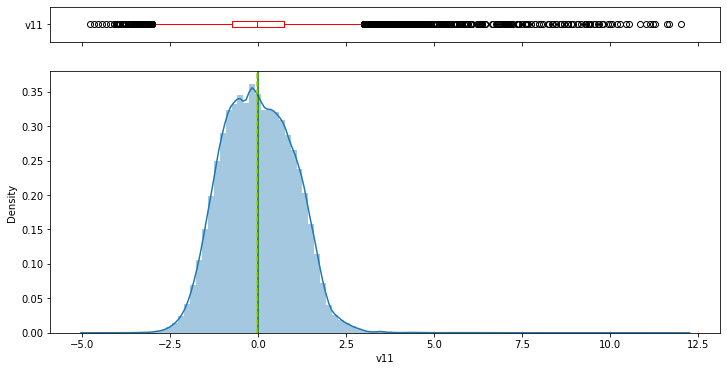

In [46]:
histogram_boxplot(df.v11, bins=100)

**v12**

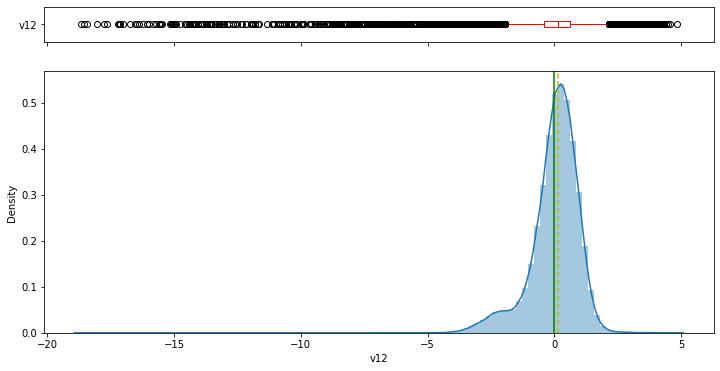

In [47]:
histogram_boxplot(df.v12, bins=100)

**v13**

In [48]:
df[df.v13<-5]

Empty DataFrame
Columns: [time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, amount, class]
Index: []

[0 rows x 31 columns]

In [49]:
df[df.v13>6]

Empty DataFrame
Columns: [time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, amount, class]
Index: []

[0 rows x 31 columns]

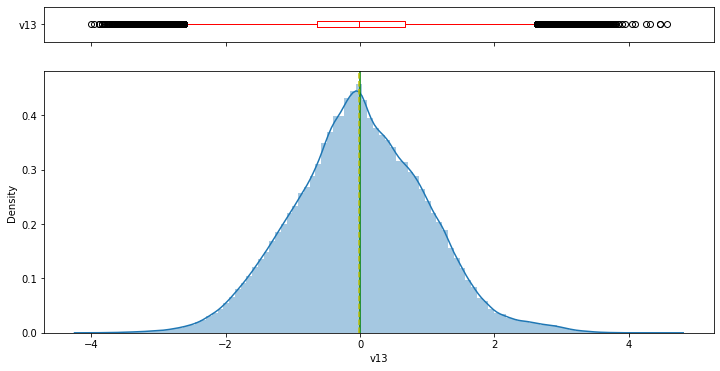

In [50]:
histogram_boxplot(df.v13, bins=100)

**v14**

In [51]:
df[df.v14<-15].v14

8296     -19.214325
8615     -18.822087
9035     -18.493773
9252     -18.049998
9487     -17.721638
9509     -17.475921
10568    -17.230202
10801    -15.066374
41943    -17.620634
42549    -15.445026
42590    -16.337596
150601   -15.393045
150644   -15.297656
150647   -15.623187
150654   -15.021657
Name: v14, dtype: float64

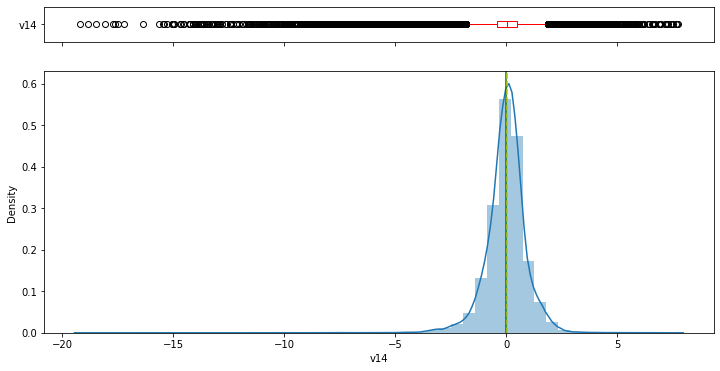

In [52]:
histogram_boxplot(df.v14, bins=50)

**v15**

In [53]:
df[df.v15>6]

Empty DataFrame
Columns: [time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, amount, class]
Index: []

[0 rows x 31 columns]

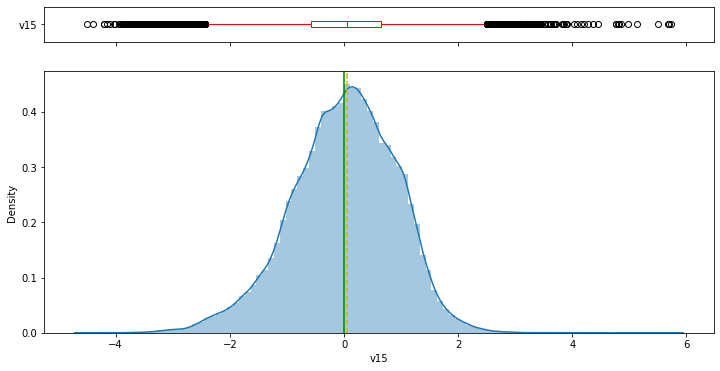

In [54]:
histogram_boxplot(df.v15, bins=100)

**v16**

In [55]:
df[df.v16>10]

Empty DataFrame
Columns: [time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, amount, class]
Index: []

[0 rows x 31 columns]

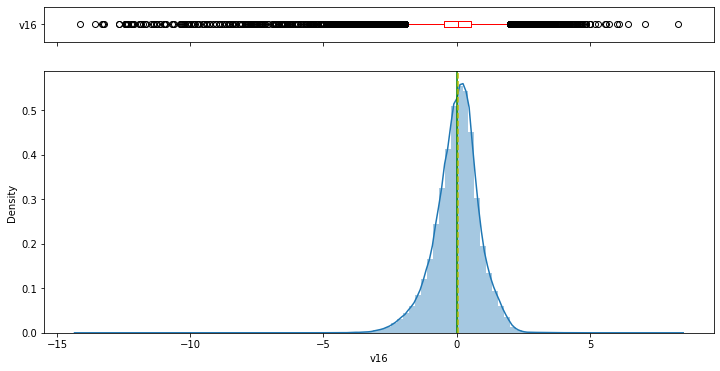

In [56]:
histogram_boxplot(df.v16, bins=100)

**v17**

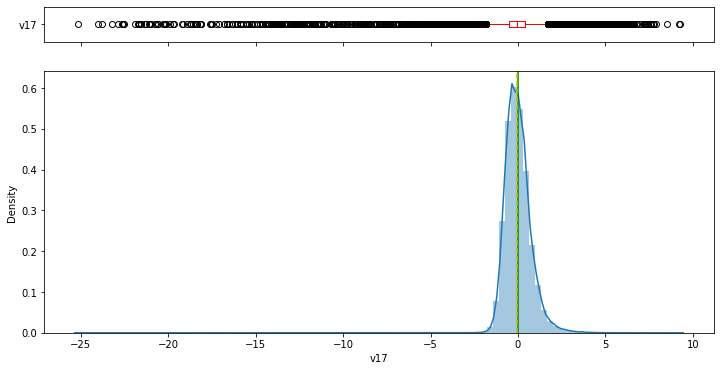

In [57]:
histogram_boxplot(df.v17, bins=100)

**v18**


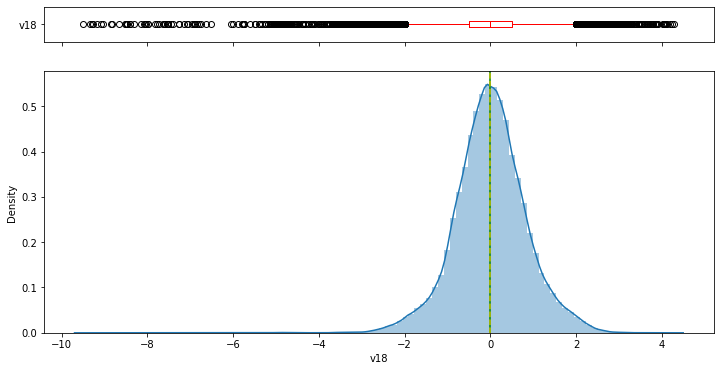

In [58]:
histogram_boxplot(df.v18, bins=100)

**v19**

In [59]:
df[df.v19<-6]

Empty DataFrame
Columns: [time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, amount, class]
Index: []

[0 rows x 31 columns]

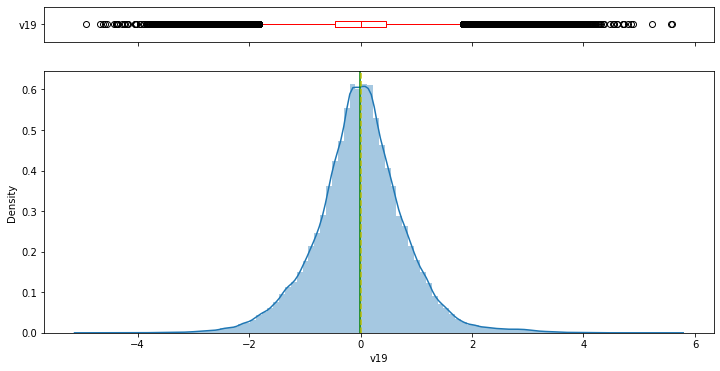

In [60]:
histogram_boxplot(df.v19, bins=100)

**v20**

In [61]:
df[df.v20<-40]

Empty DataFrame
Columns: [time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, amount, class]
Index: []

[0 rows x 31 columns]

In [62]:
df[df.v20>20]

time         v1         v2         v3         v4         v5  \
46841    42951.0 -23.712839 -42.172688 -13.320825   9.925019 -13.945538   
54018    46253.0 -21.780665 -38.305310 -12.122469   9.752791 -12.880794   
169457  119713.0 -20.924897 -37.943452 -14.060281  10.473005 -10.866639   
228723  145630.0 -32.543140 -50.383269 -10.733302   9.571705   8.656575   

              v6         v7        v8        v9  ...       v21       v22  \
46841   5.564891  15.710644 -2.844253 -1.580725  ...  7.921600 -6.320710   
54018   4.256017  14.785051 -2.818253 -0.667338  ...  7.437478 -5.619439   
169457  6.256654  14.960521 -2.392155 -0.597076  ...  6.829810 -6.926353   
228723 -6.377450   6.263440  0.235906 -2.499284  ...  7.436656 -0.242650   

              v23       v24       v25       v26       v27       v28    amount  \
46841  -11.310338  0.404175 -4.547278 -1.577118 -2.357385  2.253662  12910.93   
54018  -10.547038  0.653249 -4.232409 -0.480459 -2.257913  2.082488  11898.09   
169457  -9.928657 -0.447084 -4.848151 -2.241620 -2.140723  2.001492  11789.84   
228723  22.528412 -1.853583  4.301757 -0.076711 -3.466007  1.278494   7367.00   

        class  
46841       0  
54018       0  
169457      0  
228723      0  

[4 rows x 31 columns]

In [63]:
df[df.v20<-25]

time         v1         v2         v3        v4         v5  \
195218  130956.0 -23.209602 -20.056784 -11.851649  4.811523 -16.658993   
220090  142019.0 -37.558067 -29.335992 -24.962322  8.413616 -35.182120   

               v6         v7        v8        v9  ...        v21       v22  \
195218  13.348714  23.475217 -8.385575  4.094708  ...  -9.019472  1.039620   
220090  21.550496  36.877368 -8.915982  5.046566  ... -11.263235 -1.150828   

             v23       v24       v25       v26       v27        v28   amount  \
195218  2.990196  0.230236  3.214827  1.047926 -0.037677  14.046301  4248.34   
220090 -7.800902  1.272716  1.965365  0.767817  3.248189  13.013546  5964.95   

        class  
195218      0  
220090      0  

[2 rows x 31 columns]

In [64]:
df.drop(df[df.v20>20].index, inplace=True)

In [65]:
df.drop(df[df.v20<-25].index, inplace=True)

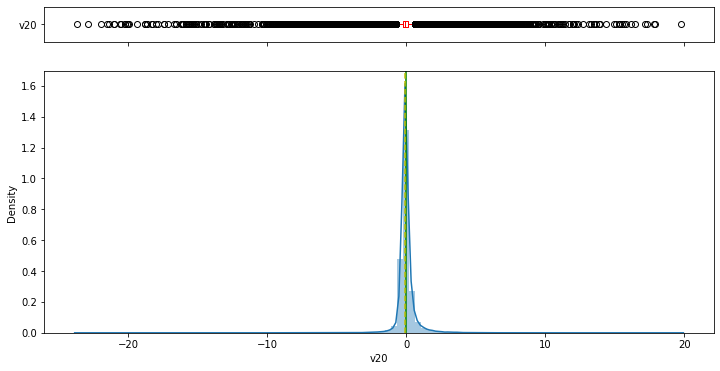

In [66]:
histogram_boxplot(df.v20, bins=100)

**v21**

In [67]:
df[df.v21<-30]

Empty DataFrame
Columns: [time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, amount, class]
Index: []

[0 rows x 31 columns]

In [68]:
df[df.v21>23]

time         v1         v2       v3        v4        v5        v6  \
102441  68207.0 -13.192671  12.785971 -9.90665  3.320337 -4.801176  5.760059   

               v7         v8       v9  ...        v21       v22       v23  \
102441 -18.750889 -37.353443 -0.39154  ...  27.202839 -8.887017  5.303607   

             v24       v25       v26       v27       v28  amount  class  
102441 -0.639435  0.263203 -0.108877  1.269566  0.939407     1.0      1  

[1 rows x 31 columns]

* It was not dropped since it is class 1.

In [69]:
#df.drop(df[df.v21>27].index, inplace=True)

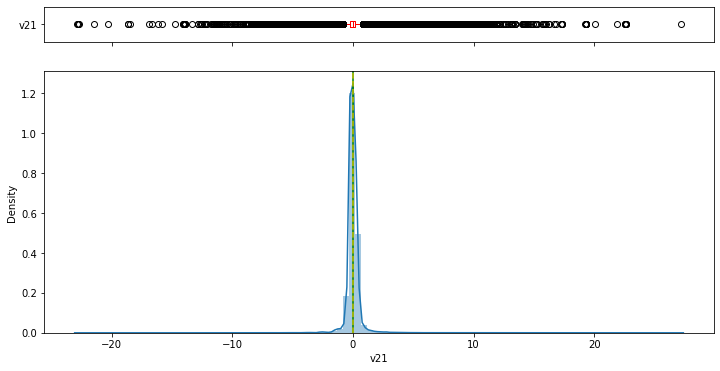

In [70]:
histogram_boxplot(df.v21, bins=100)

**v22**

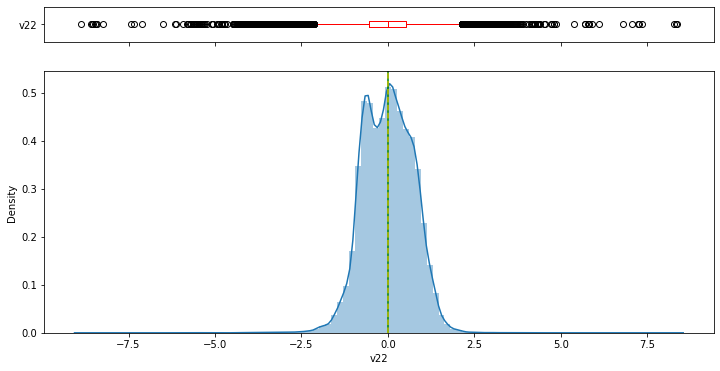

In [71]:
histogram_boxplot(df.v22, bins=100)

**v23**

In [72]:
df[df.v23 < -30]

time         v1         v2         v3         v4         v5  \
91896    63675.0 -11.987750 -15.667454  -2.708456   3.414537   4.700217   
226690  144755.0 -11.066027  -5.312984 -13.391432   2.674077 -27.737487   
227921  145283.0 -21.532478 -34.704768  -8.303035  10.264175   3.957175   
233904  147747.0  -3.226248  -4.185371   2.846206   2.190220  21.120137   

               v6         v7        v8        v9  ...       v21       v22  \
91896   -5.745405  -9.455360 -5.717320  4.114790  ... -1.331900 -5.939372   
226690  16.410638  21.444508 -9.611083  0.999300  ... -6.647066 -1.647271   
227921  -3.229695  -4.066768 -4.083971  0.554072  ...  5.198718 -7.331078   
233904 -14.352986 -23.386192 -0.073603  2.898908  ...  0.861730 -5.513446   

              v23       v24        v25       v26       v27       v28  \
91896  -44.807735  3.124267 -10.295397 -1.653193  5.002871 -0.148892   
226690 -30.269720  3.340880  -6.429334  0.167628  8.104297 -2.282919   
227921 -32.828995  0.118986  -8.696627 -1.778061 -0.519786  2.716716   
233904 -36.666000  1.348055  -6.712624  0.229669  1.789949  1.279816   

          amount  class  
91896    6000.00      0  
226690   8360.00      0  
227921  10000.00      0  
233904     12.31      0  

[4 rows x 31 columns]

In [73]:
df.drop(df[df.v23<-30].index, inplace=True)

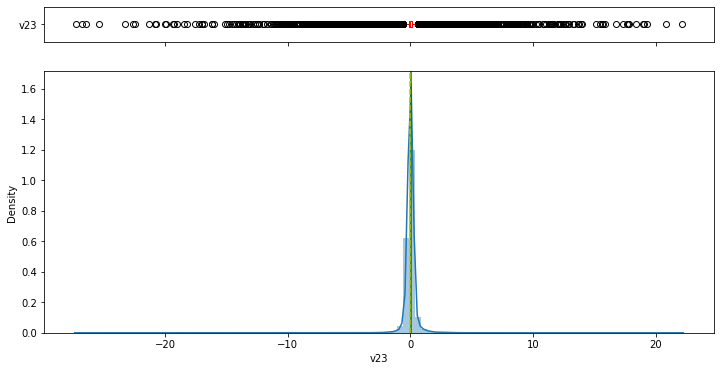

In [74]:
histogram_boxplot(df.v23, bins=100)

**v24**

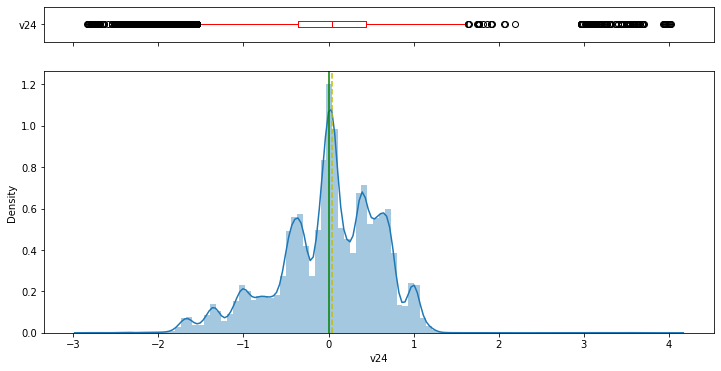

In [75]:
histogram_boxplot(df.v24, bins=100)

**v25**

In [76]:
df[df.v25>7]

time         v1         v2        v3        v4         v5  \
145022  86570.0 -36.510583 -40.938048 -5.377986  11.47459  11.066946   

              v6        v7        v8        v9  ...       v21       v22  \
145022 -5.982594  0.068963 -3.918451  7.193327  ... -8.037544  3.258447   

              v23       v24       v25       v26       v27        v28  amount  \
145022  15.879421  0.665994  7.519589  0.671345 -3.829039  22.620072   102.0   

        class  
145022      0  

[1 rows x 31 columns]

In [77]:
df[df.v25<-7]

time        v1        v2        v3        v4         v5        v6  \
15168  26525.0 -3.156608 -2.895171  3.300964  1.550562  16.160824 -8.710536   

              v7        v8        v9  ...       v21      v22        v23  \
15168 -17.936966  0.492347  1.851809  ...  0.831647 -4.12041 -26.751119   

            v24       v25       v26       v27       v28  amount  class  
15168  0.002922 -7.495741 -0.376964  1.811647  1.056891    8.94      0  

[1 rows x 31 columns]

In [78]:
df.drop(df[df.v25>7].index, inplace=True)

In [79]:
df.drop(df[df.v25<-7].index,inplace=True)

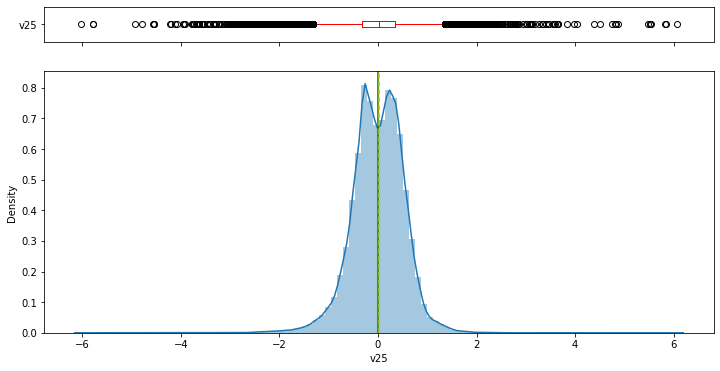

In [80]:
histogram_boxplot(df.v25, bins=100)

**v26**

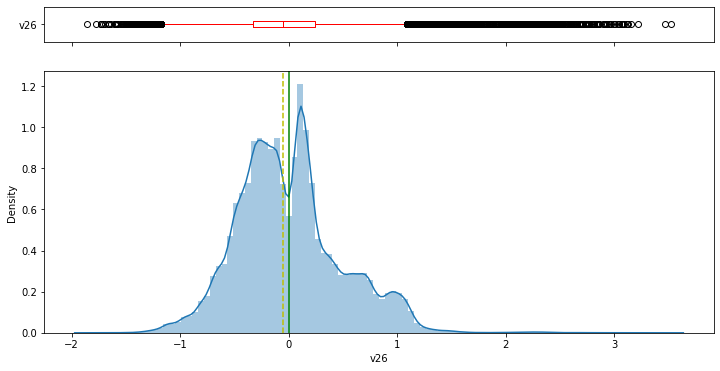

In [81]:
histogram_boxplot(df.v26, bins=100)

**v27**

In [82]:
df[df.v27>20]

Empty DataFrame
Columns: [time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, amount, class]
Index: []

[0 rows x 31 columns]

In [83]:
df[df.v27<-20]

Empty DataFrame
Columns: [time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, amount, class]
Index: []

[0 rows x 31 columns]

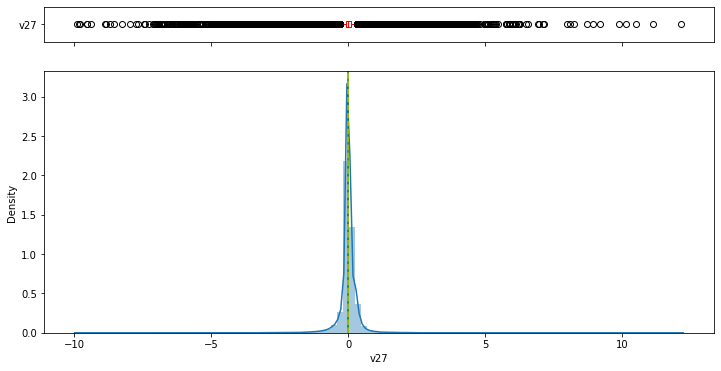

In [84]:
histogram_boxplot(df.v27, bins=100)

**v28**

In [85]:
df[df.v28>20]

Empty DataFrame
Columns: [time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, amount, class]
Index: []

[0 rows x 31 columns]

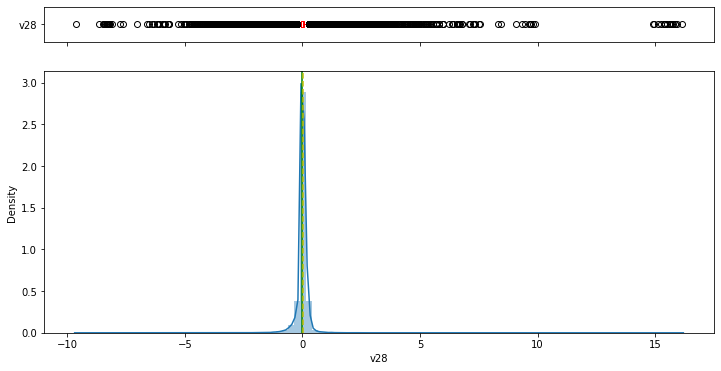

In [86]:
histogram_boxplot(df.v28, bins=100)

**amount**

In [87]:
df[df.amount>8000]

time         v1         v2         v3        v4         v5  \
74699    55709.0 -16.950064 -16.417395 -12.523381  6.555638 -27.752964   
228158  145381.0 -13.710746 -21.177912  -9.340628  8.385815 -22.756016   
245474  152763.0 -14.641710 -28.554825 -12.714462  5.878264  -7.855074   
284249  172273.0  -9.030538 -11.112584 -16.233798  3.592021 -40.427726   

               v6         v7         v8        v9  ...       v21       v22  \
74699   18.072031  28.504065 -10.152220  2.124673  ... -5.932594  0.050097   
228158  14.435314  28.239528  -2.201819 -4.713335  ...  4.993296 -0.045682   
245474   2.471004  11.922577  -2.651203 -2.223985  ...  5.788207 -3.269671   
284249  23.917837  44.054461  -7.277778 -4.210637  ... -0.269048  0.988144   

              v23       v24       v25       v26        v27       v28  \
74699  -10.855949  1.550407 -0.502172  0.821714  12.152401 -4.009839   
228158  19.228169 -1.420447  2.351701 -0.353840  -2.608043  0.804099   
245474  -8.024556  0.423021 -2.396701 -0.633380  -1.763704  1.422017   
284249   7.040028  0.347693  2.520869  2.342495   3.478175 -2.713136   

          amount  class  
74699    8790.26      0  
228158   8182.70      0  
245474   8787.00      0  
284249  10199.44      0  

[4 rows x 31 columns]

In [88]:
df.drop(df[df.amount>10000].index, inplace=True)

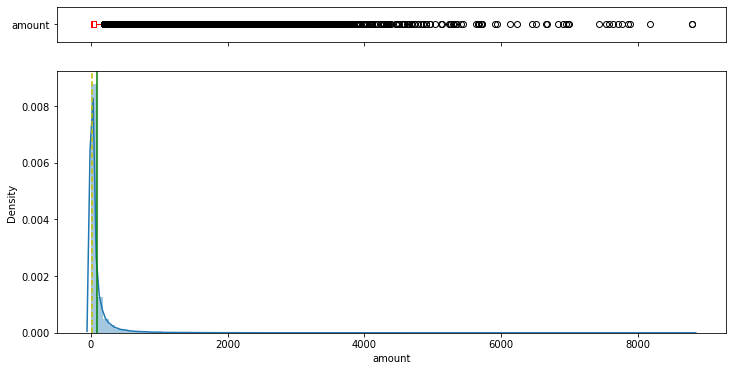

In [89]:
histogram_boxplot(df.amount, bins=100)

**Time**

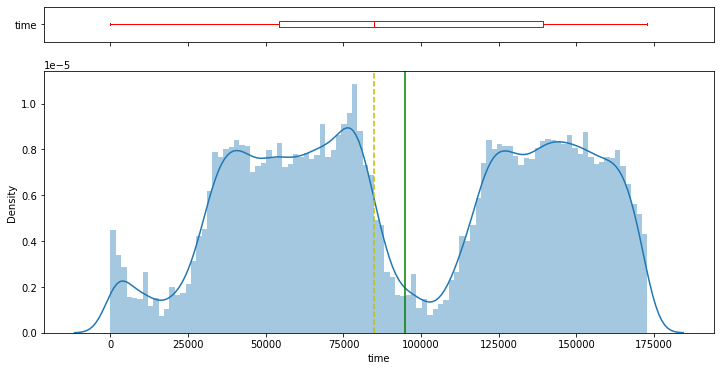

In [90]:
histogram_boxplot(df.time, bins=100)

*In strategy 1 totally 20 row was dropped*

In [91]:
df.reset_index(drop=True, inplace=True)

**Strategy 2**

In [92]:
df_o = df.copy()

In [93]:
df_o.columns = df_o.columns.str.lower()

In [94]:
for i in df_o.columns[1:-1]:
  Q1 = np.percentile(df_o[i], 25, interpolation = 'midpoint')
  Q3 = np.percentile(df_o[i], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  upper_bound_0 = (df_o[i] >= (Q3+2*IQR)) & (df_o["class"]==0)
  lower_bound_0 = (df_o[i] <= (Q1-2*IQR)) & (df_o["class"]==0)
  upper_points_0 = np.where(upper_bound_0)
  lower_points_0 = np.where(lower_bound_0)
  upper_bound_1 = (df_o[i] >= (Q3+2*IQR)) & (df_o["class"]==1)
  lower_bound_1 = (df_o[i] <= (Q1-2*IQR)) & (df_o["class"]==1)
  upper_points_1 = np.where(upper_bound_1)
  lower_points_1 = np.where(lower_bound_1)
  print(f"column {i} : Outlier count (whisker 2)--> Class 0 \
  {len(upper_points_0[0])+len(lower_points_0[0])}, Class 1:  \
  {len(upper_points_1[0])+len(lower_points_1[0])} ")

column v1 : Outlier count (whisker 2)--> Class 0   4204, Class 1:    122 
column v2 : Outlier count (whisker 2)--> Class 0   8681, Class 1:    175 
column v3 : Outlier count (whisker 2)--> Class 0   1504, Class 1:    245 
column v4 : Outlier count (whisker 2)--> Class 0   4491, Class 1:    249 
column v5 : Outlier count (whisker 2)--> Class 0   5813, Class 1:    163 
column v6 : Outlier count (whisker 2)--> Class 0   18867, Class 1:    77 
column v7 : Outlier count (whisker 2)--> Class 0   5459, Class 1:    249 
column v8 : Outlier count (whisker 2)--> Class 0   16884, Class 1:    200 
column v9 : Outlier count (whisker 2)--> Class 0   2746, Class 1:    160 
column v10 : Outlier count (whisker 2)--> Class 0   5255, Class 1:    355 
column v11 : Outlier count (whisker 2)--> Class 0   98, Class 1:    211 
column v12 : Outlier count (whisker 2)--> Class 0   7834, Class 1:    372 
column v13 : Outlier count (whisker 2)--> Class 0   396, Class 1:    0 
column v14 : Outlier count (whisker 2)

* **If we drop outliers even with whisker 2, we have to drop about 100000 observatios which is very high.**
* **Instead it was determined different values between max,min values and whiskers and data dropped according to these values.**

In [95]:
list_f1 = [ 'v11', 'v22']

list_f2 = ['v1', 'v2', 'v3', "v4", 'v5','v7', 'v9', 'v10','v12',"v13","v15",  'v24','v25','v26','v16','v18', "amount"]
list_f3 = [  "v6", "v8","v12","v14",'v17','v19',"v20","v21","v23", "v27","v28"]

for i in df_o.columns[1:-1]:
  if i in list_f1:
    pert = 1
  elif i in list_f2:
    pert = 0.85
  else:
    pert = 0.75
  Q1 = np.percentile(df_o[i], 25, interpolation = 'midpoint')
  Q3 = np.percentile(df_o[i], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  max_bound = max(df_o[i]) - ((max(df_o[i])-(Q3+1.5*IQR)) * pert)
  min_bound = min(df_o[i]) + (((Q1-1.5*IQR)-min(df_o[i])) * pert)
  upper_bound_0 = (df_o[i] >= max_bound) & (df_o["class"]==0)
  lower_bound_0 = (df_o[i] <= min_bound) & (df_o["class"]==0)
  upper_points_0 = np.where(upper_bound_0)
  lower_points_0 = np.where(lower_bound_0)
  upper_bound_1 = (df_o[i] >= max_bound) & (df_o["class"]==1)
  lower_bound_1 = (df_o[i] <= min_bound) & (df_o["class"]==1)
  upper_points_1 = np.where(upper_bound_1)
  lower_points_1 = np.where(lower_bound_1)
  outlier_0 = len(upper_points_0[0])+len(lower_points_0[0])
  outlier_1 = len(upper_points_1[0])+len(lower_points_1[0])
  print(f"column {i} : Outlier count--> Class 0: {outlier_0}, Class 1:\
  {outlier_1}, Ratio: {outlier_1/(outlier_0 + outlier_1)}")

column v1 : Outlier count--> Class 0: 909, Class 1:  74, Ratio: 0.0752797558494405
column v2 : Outlier count--> Class 0: 1557, Class 1:  92, Ratio: 0.05579138872043663
column v3 : Outlier count--> Class 0: 303, Class 1:  116, Ratio: 0.27684964200477324
column v4 : Outlier count--> Class 0: 2264, Class 1:  205, Ratio: 0.08302956662616444
column v5 : Outlier count--> Class 0: 603, Class 1:  69, Ratio: 0.10267857142857142
column v6 : Outlier count--> Class 0: 239, Class 1:  0, Ratio: 0.0
column v7 : Outlier count--> Class 0: 557, Class 1:  104, Ratio: 0.1573373676248109
column v8 : Outlier count--> Class 0: 500, Class 1:  49, Ratio: 0.08925318761384335
column v9 : Outlier count--> Class 0: 1432, Class 1:  94, Ratio: 0.061598951507208385
column v10 : Outlier count--> Class 0: 2107, Class 1:  187, Ratio: 0.08151700087183958
column v11 : Outlier count--> Class 0: 453, Class 1:  276, Ratio: 0.3786008230452675
column v12 : Outlier count--> Class 0: 421, Class 1:  281, Ratio: 0.4002849002849002

In [96]:
list_f1 = [ 'v11', 'v22']

list_f2 = ['v1', 'v2', 'v3', "v4", 'v5','v7', 'v9', 'v10','v12',"v13","v15",
           'v24','v25','v26','v16','v18', "amount"]
list_f3 = [  "v6", "v8","v12","v14",'v17','v19',"v20","v21","v23", "v27","v28"]

indexes = []

for i in df_o.columns[1:-1]:
  if i in list_f1:
    pert = 1
  elif i in list_f2:
    pert = 0.85
  else:
    pert = 0.75
  Q1 = np.percentile(df_o[i], 25, interpolation = 'midpoint')
  Q3 = np.percentile(df_o[i], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  max_bound = max(df_o[i]) - ((max(df_o[i])-(Q3+1.5*IQR)) * pert)
  min_bound = min(df_o[i]) + (((Q1-1.5*IQR)-min(df_o[i])) * pert)
  upper_bound_0 = (df_o[i] >= max_bound) & (df_o["class"]==0)
  lower_bound_0 = (df_o[i] <= min_bound) & (df_o["class"]==0)
  upper_points_0 = df_o[upper_bound_0].index
  lower_points_0 = df_o[lower_bound_0].index
  indexes = indexes + list(upper_points_0.values) + list(lower_points_0.values)
len(set(indexes))


17056

In [97]:
index_drop = list(set(indexes))
df_o.drop(index_drop,inplace=True)

In [98]:
df_o.shape

(266650, 31)

In [99]:
df_o["class"].value_counts()

0    266177
1       473
Name: class, dtype: int64

In [100]:
df_o.reset_index(drop=True, inplace=True)

* 17056 outlier values were dropped. All of them are class 0 outliers.
* It is seemed among the outliers the ratio of class 1 is higher than its ratio in all data. 
* This means that most of frauds are outlier movements.
* The model probably gives better results when we drop only class 0 outliers but it can cause bad results if the model we created is tested on other data. Let's try and see.

**Means of features according to classes.**

*We compared values of class feature. As you can see in amount feature that they are separated than each others.*

In [101]:
df.groupby("class").mean().T

class              0             1
time    94834.576720  80450.513742
v1          0.015151     -4.498280
v2         -0.007721      3.405965
v3          0.013704     -6.729599
v4         -0.011027      4.472591
v5          0.007512     -2.957197
v6          0.000808     -1.432518
v7          0.009535     -5.175912
v8         -0.001776      0.953255
v9          0.002494     -2.522124
v10         0.007758     -5.453274
v11        -0.006127      3.716347
v12         0.009458     -6.103254
v13         0.000658     -0.094324
v14         0.011675     -6.835946
v15         0.000973     -0.072830
v16         0.007625     -4.000956
v17         0.011017     -6.463285
v18         0.005128     -2.157071
v19        -0.001313      0.669143
v20        -0.000592      0.405043
v21        -0.000971      0.466550
v22         0.000008      0.086639
v23         0.001123     -0.096464
v24         0.000330     -0.106643
v25        -0.000137      0.040615
v26         0.000090      0.050456
v27         0.001417      0.213774
v28         0.000115      0.078270
amount     87.871265    123.871860

In [102]:
df.iloc[:,1:].groupby("class").mean()

v1        v2        v3        v4        v5        v6        v7  \
class                                                                         
0      0.015151 -0.007721  0.013704 -0.011027  0.007512  0.000808  0.009535   
1     -4.498280  3.405965 -6.729599  4.472591 -2.957197 -1.432518 -5.175912   

             v8        v9       v10  ...       v20       v21       v22  \
class                                ...                                 
0     -0.001776  0.002494  0.007758  ... -0.000592 -0.000971  0.000008   
1      0.953255 -2.522124 -5.453274  ...  0.405043  0.466550  0.086639   

            v23       v24       v25       v26       v27       v28      amount  
class                                                                          
0      0.001123  0.000330 -0.000137  0.000090  0.001417  0.000115   87.871265  
1     -0.096464 -0.106643  0.040615  0.050456  0.213774  0.078270  123.871860  

[2 rows x 29 columns]

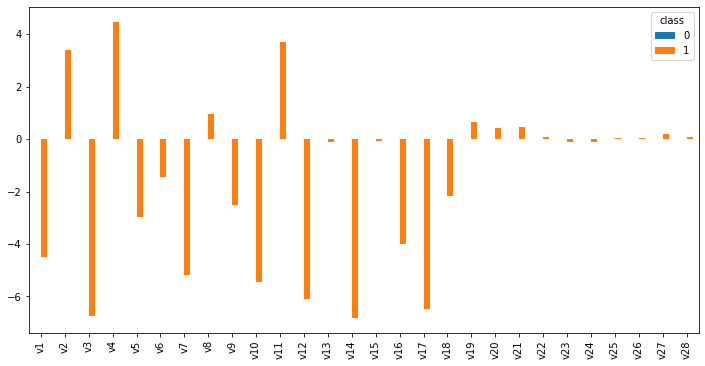

In [103]:
df.groupby("class").mean().T[1:-1].plot.bar(figsize=(12,6));

*The means of columns in class 0 is very close to 0. However, the means of columns in class 1 differ from 0.*

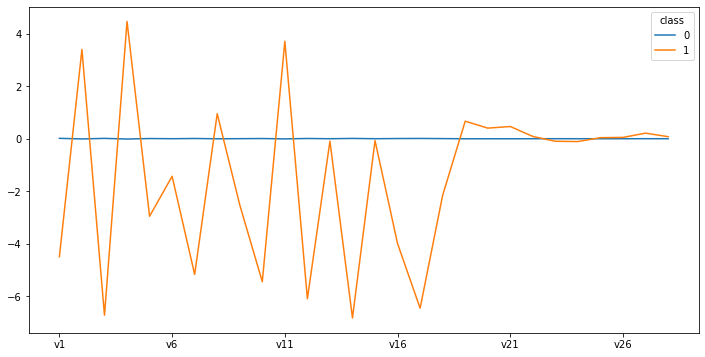

In [104]:
df.groupby("class").mean().T[1:-1].plot(figsize=(12,6));

The means of amount feature according to the classes differ from each other.
It can be said that Fraud cases have higher amount.

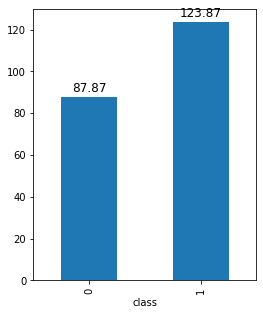

In [105]:
ax = df.groupby("class").amount.mean().T.plot.bar(figsize=(4,5))
for p in ax.patches:
  #ax.bar_label(p)
  ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x()+0.25,
                    p.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
  ;

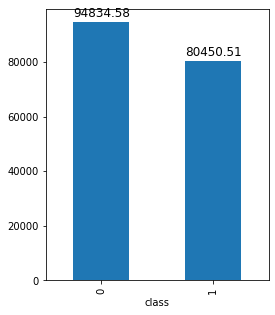

In [106]:
ax = df.groupby("class").time.mean().T.plot.bar(figsize=(4,5))
for p in ax.patches:
  #ax.bar_label(p)
  ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x()+0.25,
                    p.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
  ;

* It is seemed that the means of features in class 0 are all 0 or very close to 0.
* The means of features in class 1 change from -6 to 4.
* The means of classes are very close in the features v20, v21, ..., v28.
* The means of classes differ in "amount" and "time" features.

**Since data is very big, only pairplots of some columns were given. In the scatter plots, it is seen that frauds are mostly in the outliers.**




In [107]:
data1 = pd.concat([df.iloc[:,:6],df["class"]],axis=1)

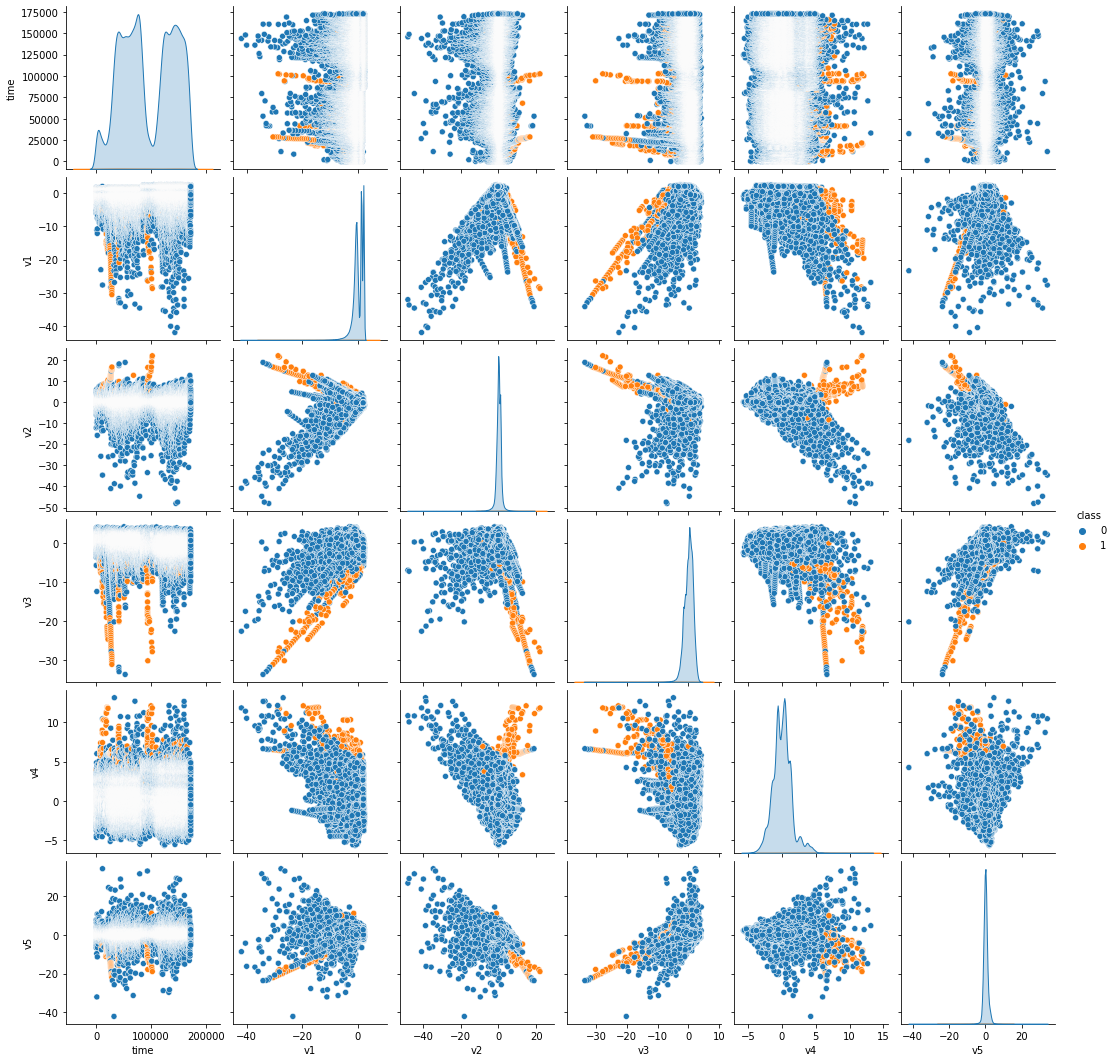

In [108]:
sns.pairplot(data=data1, hue="class")

In [109]:
df.corr()

time        v1        v2        v3        v4        v5        v6  \
time    1.000000  0.118951 -0.010677 -0.423635 -0.106095  0.177388 -0.064313   
v1      0.118951  1.000000 -0.015567 -0.017498  0.009322 -0.015099  0.004561   
v2     -0.010677 -0.015567  1.000000 -0.007918  0.009777 -0.003677  0.002712   
v3     -0.423635 -0.017498 -0.007918  1.000000  0.007530 -0.022220  0.007634   
v4     -0.106095  0.009322  0.009777  0.007530  1.000000  0.006359 -0.003169   
v5      0.177388 -0.015099 -0.003677 -0.022220  0.006359  1.000000  0.024408   
v6     -0.064313  0.004561  0.002712  0.007634 -0.003169  0.024408  1.000000   
v7      0.086782  0.002763  0.025724  0.006159 -0.002183  0.035558 -0.027479   
v8     -0.038552 -0.007317 -0.001039 -0.007374  0.003097 -0.009035  0.012032   
v9     -0.007848  0.003319  0.001715 -0.003964  0.001731 -0.003644  0.000725   
v10     0.031222 -0.000629 -0.001573 -0.013068  0.003896 -0.013472  0.002200   
v11    -0.248658  0.002787  0.001807  0.003607 -0.002018  0.002479 -0.001548   
v12     0.125662 -0.001268  0.002494 -0.006609  0.003363 -0.005836  0.001024   
v13    -0.066061  0.001834  0.004567  0.002090 -0.001051  0.002963 -0.001124   
v14    -0.100378 -0.002595  0.003400 -0.002691  0.002534 -0.001930  0.001123   
v15    -0.184609  0.002732  0.006386  0.001273 -0.000997  0.002441 -0.002568   
v16     0.011128  0.001133  0.009421 -0.000012  0.001290  0.005520 -0.004909   
v17    -0.073796 -0.004636  0.002035 -0.009192  0.004097 -0.007300  0.000214   
v18     0.090406 -0.003476  0.003689 -0.003406  0.002020 -0.002927  0.000914   
v19     0.029457  0.000272 -0.002565 -0.000363  0.000050  0.001224 -0.000638   
v20    -0.052013 -0.002734  0.008474 -0.006465 -0.001261 -0.018371  0.012617   
v21     0.046491 -0.000609 -0.002315 -0.000089 -0.000804 -0.007433  0.006073   
v22     0.144013 -0.004669 -0.006463 -0.001919  0.002253  0.000477 -0.000892   
v23     0.053746 -0.011710 -0.021130 -0.007046  0.006837 -0.003347 -0.000048   
v24    -0.016015  0.000678  0.002568  0.001357 -0.000833  0.002988 -0.000412   
v25    -0.234404 -0.001582 -0.005496 -0.000419  0.001421  0.000964 -0.000435   
v26    -0.041939 -0.001201 -0.001511  0.000234  0.001170  0.002552 -0.001594   
v27    -0.006005 -0.016063  0.004211  0.002163  0.000493  0.022846 -0.017869   
v28    -0.009355  0.018532  0.036064  0.004672 -0.009012 -0.021118  0.016392   
amount -0.012000 -0.215389 -0.526056 -0.196327  0.088056 -0.368332  0.201880   
class  -0.012359 -0.095235  0.086155 -0.183158  0.129572 -0.089549 -0.044274   

              v7        v8        v9  ...       v21       v22       v23  \
time    0.086782 -0.038552 -0.007848  ...  0.046491  0.144013  0.053746   
v1      0.002763 -0.007317  0.003319  ... -0.000609 -0.004669 -0.011710   
v2      0.025724 -0.001039  0.001715  ... -0.002315 -0.006463 -0.021130   
v3      0.006159 -0.007374 -0.003964  ... -0.000089 -0.001919 -0.007046   
v4     -0.002183  0.003097  0.001731  ... -0.000804  0.002253  0.006837   
v5      0.035558 -0.009035 -0.003644  ... -0.007433  0.000477 -0.003347   
v6     -0.027479  0.012032  0.000725  ...  0.006073 -0.000892 -0.000048   
v7      1.000000 -0.000109 -0.004268  ...  0.014754 -0.001960  0.005458   
v8     -0.000109  1.000000  0.000665  ...  0.005212 -0.003119  0.001473   
v9     -0.004268  0.000665  1.000000  ...  0.000986  0.001140  0.003443   
v10    -0.008688 -0.002627 -0.014847  ...  0.002833 -0.000871  0.000974   
v11    -0.001039  0.005321 -0.000786  ... -0.002057  0.000062  0.001602   
v12    -0.000856 -0.003851 -0.002224  ...  0.003543  0.000616  0.003130   
v13    -0.004810 -0.001687  0.000542  ...  0.000386  0.000681  0.001236   
v14    -0.000070 -0.007686  0.003438  ...  0.004745 -0.000960  0.003040   
v15    -0.007060  0.001857 -0.000926  ...  0.000713 -0.000472  0.005044   
v16    -0.014923 -0.000825  0.000077  ...  0.008511 -0.000976  0.003925   
v17    -0.004391 -0.006328 -0.001650  ...  0.002329  0.000387  0.002144   
v18    -0.003988 -0.001412

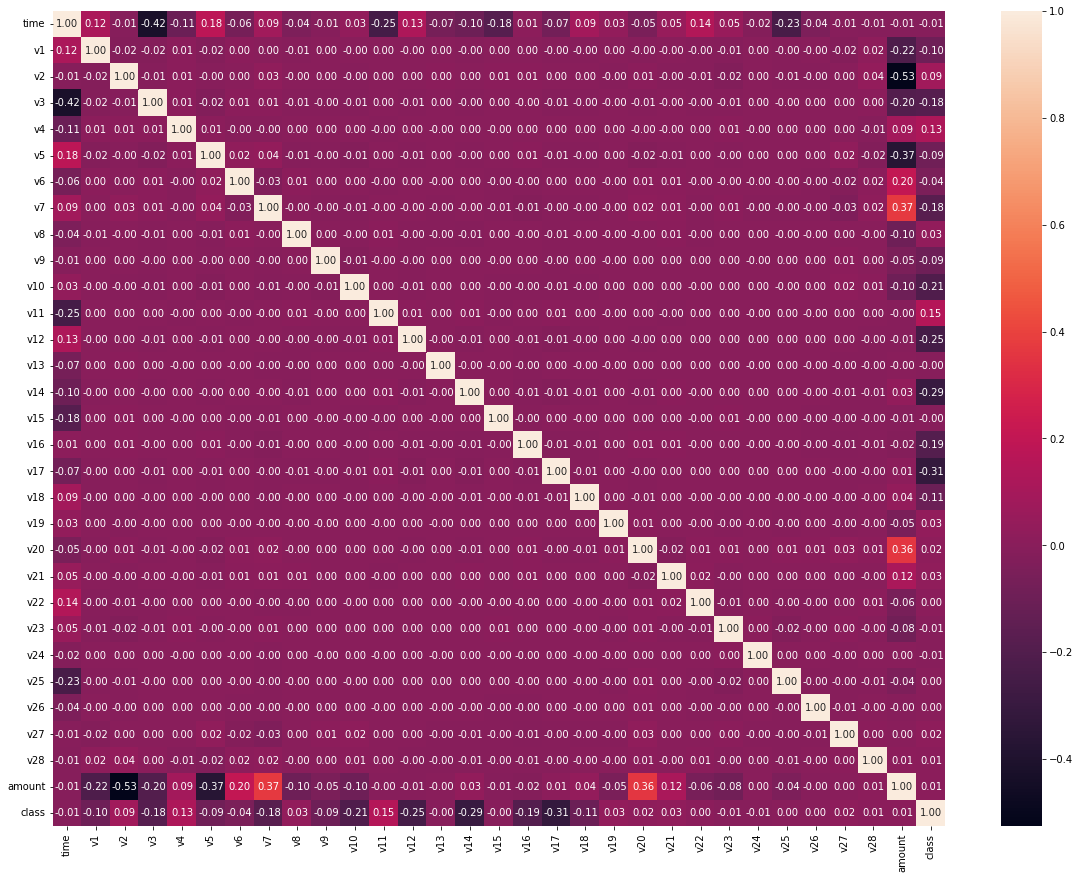

In [110]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt= ".2f")

**Specifically we checked correlations with class feature. Because of class feature is our dependent feature.**

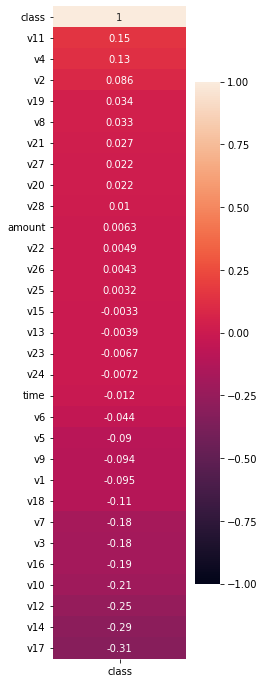

In [111]:
plt.figure(figsize=(3,12))
sns.heatmap(data=df.corr()[["class"]].sort_values(by="class", ascending=False),
            annot=True, vmin=-1);

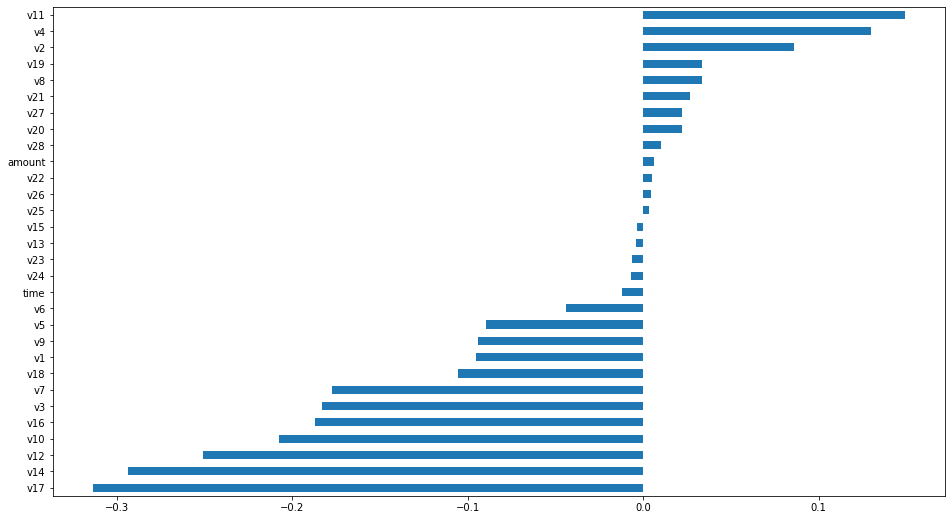

In [112]:
plt.figure(figsize=(16,9))
df.corr()["class"].drop("class").sort_values(ascending=True).plot.barh();

* Correlation of features with target is low. 
* There are negative medium-low correlations between target and the features v17, v14, v12, v10, v16, v3, v7.

## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [113]:
X = df.drop(["class"], axis=1)
y = df["class"]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=5)

In [115]:
y_train.value_counts(normalize=True)

0    0.998335
1    0.001665
Name: class, dtype: float64

In [116]:
y_test.value_counts(normalize=True)

0    0.998326
1    0.001674
Name: class, dtype: float64

In [117]:
X_o = df_o.drop(["class"], axis=1)
y_o = df_o["class"]

In [118]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, test_size=0.20, stratify=y_o, random_state=5)

#### Scaling

**Scaling the features makes the flow of gradient descent smooth and helps algorithms quickly reach the minima of the cost function. Without scaling features, the algorithm may be biased toward the feature which has values higher in magnitude.**
**Additional Resource:**
* https://analyticsindiamag.com/why-data-scaling-is-important-in-machine-learning-how-to-effectively-do-it/
* https://www.analyticsvidhya.com/blog/2021/05/feature-scaling-techniques-in-python-a-complete-guide/

In [119]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
scaler2 = StandardScaler()

X_train_scaled_o = scaler2.fit_transform(X_train_o)
X_test_scaled_o = scaler2.transform(X_test_o)

### Measure and CV Functions

✅ **We created a function to evaluate our model**

In [121]:
# eval_metric function returns the train and test confusion matrices and their heatmap plots. 

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print("--------------------------------------")
    print("Confusion_matrix: ")
    print(confusion_matrix(y_test, y_pred))
    print("classification_report")
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print("--------------------------------------")
    print("Confusion_matrix:")
    print(confusion_matrix(y_train, y_train_pred))
    print("classification_report")
    print(classification_report(y_train, y_train_pred))
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.flatten()
    plot_confusion_matrix(model, X_test, y_test, ax=ax[0])
    ax[0].title.set_text("Test Confusion Matrix")
    plot_confusion_matrix(model, X_train, y_train, ax=ax[1])
    ax[1].title.set_text("Train Confusion Matrix")
    plt.tight_layout();

In [122]:
# metric_df functions returns a dataframe composed of scores of binary classification model.

def metric_df(model, X_train, y_train, X_test, y_test,name):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    scores = {name: {"precision" : precision_score(y_test, y_pred),
    "recall" : recall_score(y_test, y_pred),                          
    "f1" : f1_score(y_test,y_pred)}}
    scores_df = pd.DataFrame(scores, index=["precision","recall","f1"])
    return scores_df

**Stratified K-Folds cross-validator. Provides train/test indices to split data in train/test sets. This cross-validation object is a variation of KFold that returns stratified folds.**
**Additional Resource:**
* https://analyticsindiamag.com/hands-on-tutorial-on-performance-measure-of-stratified-k-fold-cross-validation/
* https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/
* https://www.analyseup.com/python-machine-learning/stratified-kfold.html

In [123]:
from sklearn.model_selection import StratifiedKFold

def stratified_cv(n, X, y, model):
  kf = StratifiedKFold(n_splits=n,shuffle=True,random_state=5)
  pred_test_full =0
  cv_score = {}
  cv_score["precision"] = []
  cv_score["recall"] = []
  cv_score["f1"] = []
  i=1
  for train_index,test_index in kf.split(X,y):
      print('{} of KFold {}'.format(i,kf.n_splits))
      xtr,xvl = X.loc[train_index],X.loc[test_index]
      ytr,yvl = y.loc[train_index],y.loc[test_index]
      #model
      lr = Pipeline(steps =[ ('scale',StandardScaler()), ("model",model) ])
      lr.fit(xtr,ytr)
      y_pred = lr.predict(xvl)
      cv_score["precision"].append(precision_score(yvl, y_pred))
      cv_score["recall"].append(recall_score(yvl, y_pred))                          
      cv_score["f1"].append(f1_score(yvl,y_pred))   
      i+=1
  cv_scores = pd.DataFrame(cv_score)
  return cv_scores

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***ii. Model Training***

*On dataframe only extreme outliers were dropped.*

In [124]:
log_model=LogisticRegression(class_weight= ["balanced"])
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight=['balanced'])

*On dataframe more outliers were dropped.*

In [125]:
log_model_o=LogisticRegression(class_weight= ["balanced"])
log_model_o.fit(X_train_scaled_o, y_train_o)

LogisticRegression(class_weight=['balanced'])

***iii. Prediction and Model Evaluating***

*On dataframe only extreme outliers were dropped.*

Test_Set
--------------------------------------
Confusion_matrix: 
[[56640     7]
 [   35    60]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56647
           1       0.90      0.63      0.74        95

    accuracy                           1.00     56742
   macro avg       0.95      0.82      0.87     56742
weighted avg       1.00      1.00      1.00     56742


Train_Set
--------------------------------------
Confusion_matrix:
[[226554     32]
 [   148    230]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226586
           1       0.88      0.61      0.72       378

    accuracy                           1.00    226964
   macro avg       0.94      0.80      0.86    226964
weighted avg       1.00      1.00      1.00    226964



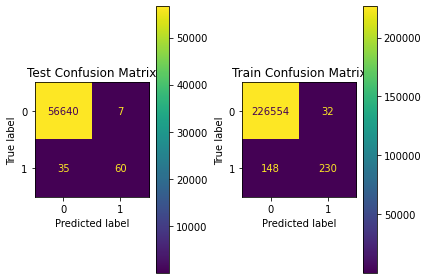

In [126]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

*On dataframe more outliers were dropped.*

Test_Set
--------------------------------------
Confusion_matrix: 
[[53235     0]
 [   15    80]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53235
           1       1.00      0.84      0.91        95

    accuracy                           1.00     53330
   macro avg       1.00      0.92      0.96     53330
weighted avg       1.00      1.00      1.00     53330


Train_Set
--------------------------------------
Confusion_matrix:
[[212936      6]
 [    74    304]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212942
           1       0.98      0.80      0.88       378

    accuracy                           1.00    213320
   macro avg       0.99      0.90      0.94    213320
weighted avg       1.00      1.00      1.00    213320



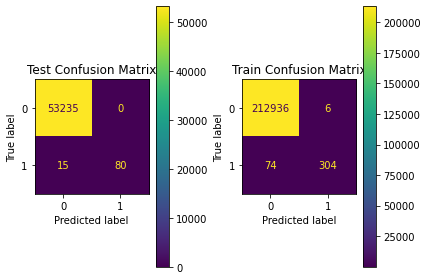

In [127]:
eval_metric(log_model_o, X_train_scaled_o, y_train_o, X_test_scaled_o, y_test_o)


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

**Precision can be seen as a measure of quality, and recall as a measure of quantity. Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned).**

**Additional Resource:**
* https://medium.com/@shrutisaxena0617/precision-vs-recall-386cf9f89488
* https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/

***iv. Plot Precision and Recall Curve***


In [128]:
from yellowbrick.classifier import PrecisionRecallCurve

**A precision-recall curve shows the relationship between precision (= positive predictive value) and recall (= sensitivity) for every possible cut-off. The PRC is a graph with: • The x-axis showing recall (= sensitivity = TP / (TP + FN)) • The y-axis showing precision (= positive predictive value = TP / (TP + FP))**

**Additional Resource:**
* https://acutecaretesting.org/en/articles/precision-recall-curves-what-are-they-and-how-are-they-used
* https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
*https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248

*On dataframe only extreme outliers were dropped.*

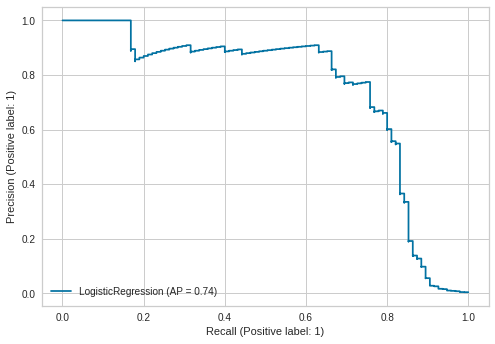

In [129]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

*On dataframe more outliers were dropped.*

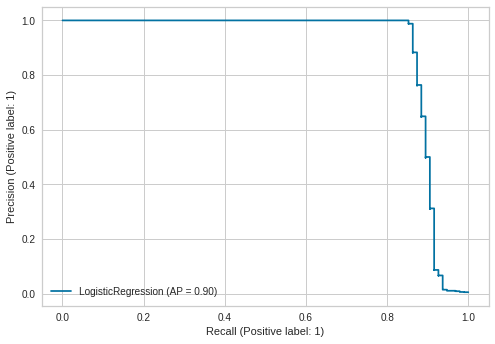

In [130]:
plot_precision_recall_curve(log_model_o, X_test_scaled_o, y_test_o);

***v. Apply StratifiedKFold***

*On dataframe only extreme outliers were dropped.*

In [131]:
stratified_cv(5, X, y, LogisticRegression(class_weight= ["balanced"]))

1 of KFold 5
2 of KFold 5
3 of KFold 5
4 of KFold 5
5 of KFold 5


precision    recall        f1
0   0.849315  0.652632  0.738095
1   0.853333  0.680851  0.757396
2   0.906250  0.617021  0.734177
3   0.838710  0.547368  0.662420
4   0.924528  0.515789  0.662162

In [132]:
log_df = pd.DataFrame(stratified_cv(5, X, y, LogisticRegression(class_weight= ["balanced"])).mean(),columns= ["Log"])
log_df

1 of KFold 5
2 of KFold 5
3 of KFold 5
4 of KFold 5
5 of KFold 5


Log
precision  0.874427
recall     0.602732
f1         0.710850

In [133]:
results_df = log_df

*On dataframe more outliers were dropped.*

In [134]:
stratified_cv(5, X_o, y_o, LogisticRegression(class_weight= ["balanced"]))

1 of KFold 5
2 of KFold 5
3 of KFold 5
4 of KFold 5
5 of KFold 5


precision    recall        f1
0   1.000000  0.702128  0.825000
1   0.951807  0.840426  0.892655
2   0.988095  0.873684  0.927374
3   0.975904  0.852632  0.910112
4   0.986111  0.747368  0.850299

In [135]:
log_o_df = pd.DataFrame(stratified_cv(5, X_o, y_o, LogisticRegression(class_weight= ["balanced"])).mean(),columns= ["Log_o"])
log_o_df

1 of KFold 5
2 of KFold 5
3 of KFold 5
4 of KFold 5
5 of KFold 5


Log_o
precision  0.980383
recall     0.803247
f1         0.881088

In [136]:
results_df_o = log_o_df

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

**Additional Resource:**
* https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
* https://www.youtube.com/watch?v=dkXB8HH_4-k
* https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [137]:
from imblearn.over_sampling import SMOTE

In [138]:
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(df.drop(["class"], axis=1), df["class"])

In [139]:
X.shape,  X_smote.shape

((283706, 30), (566466, 30))

In [140]:
oversample = SMOTE()
X_smote_o, y_smote_o = oversample.fit_resample(df_o.drop(["class"], axis=1), df_o["class"])

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [141]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_smote, y_smote, test_size=0.20, stratify=y_smote, random_state=5)

In [142]:
X_train_so, X_test_so, y_train_so, y_test_so = train_test_split(X_smote_o, y_smote_o, test_size=0.20, stratify=y_smote_o, random_state=5)

***ii. Model Training***

*On dataframe only extreme outliers were dropped.*

In [143]:
log_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("log",LogisticRegression()) ])

In [144]:
log_pipe.fit(X_train_s,y_train_s)

Pipeline(steps=[('scale', StandardScaler()), ('log', LogisticRegression())])

*On dataframe more outliers were dropped.*

In [145]:
log_pipe_o = Pipeline(steps =[ ('scale',StandardScaler()), ("log",LogisticRegression()) ])
log_pipe_o.fit(X_train_so,y_train_so)

Pipeline(steps=[('scale', StandardScaler()), ('log', LogisticRegression())])

***iii. Prediction and Model Evaluating***

*On dataframe only extreme outliers were dropped.*

Test_Set
--------------------------------------
Confusion_matrix: 
[[56122   525]
 [ 1848 54799]]
classification_report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56647
           1       0.99      0.97      0.98     56647

    accuracy                           0.98    113294
   macro avg       0.98      0.98      0.98    113294
weighted avg       0.98      0.98      0.98    113294


Train_Set
--------------------------------------
Confusion_matrix:
[[224534   2052]
 [  7563 219023]]
classification_report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    226586
           1       0.99      0.97      0.98    226586

    accuracy                           0.98    453172
   macro avg       0.98      0.98      0.98    453172
weighted avg       0.98      0.98      0.98    453172



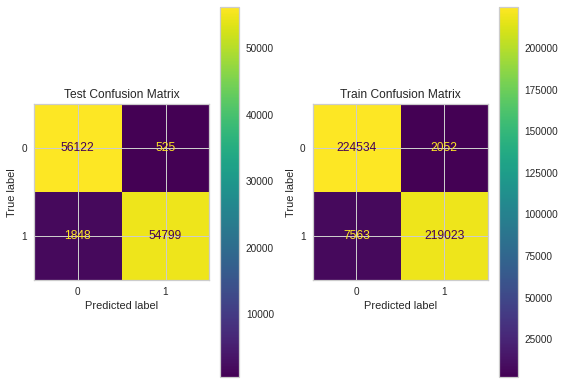

In [146]:
eval_metric(log_pipe, X_train_s, y_train_s, X_test_s, y_test_s)

In [147]:
log_smote_all = metric_df(log_pipe, X_train_s, y_train_s, X_test_s, y_test_s,"log_smote_all")
log_smote_all

log_smote_all
precision       0.990510
recall          0.967377
f1              0.978807

*On dataframe more outliers were dropped.*

Test_Set
--------------------------------------
Confusion_matrix: 
[[52816   419]
 [ 1471 51765]]
classification_report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     53235
           1       0.99      0.97      0.98     53236

    accuracy                           0.98    106471
   macro avg       0.98      0.98      0.98    106471
weighted avg       0.98      0.98      0.98    106471


Train_Set
--------------------------------------
Confusion_matrix:
[[211356   1586]
 [  5703 207238]]
classification_report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    212942
           1       0.99      0.97      0.98    212941

    accuracy                           0.98    425883
   macro avg       0.98      0.98      0.98    425883
weighted avg       0.98      0.98      0.98    425883



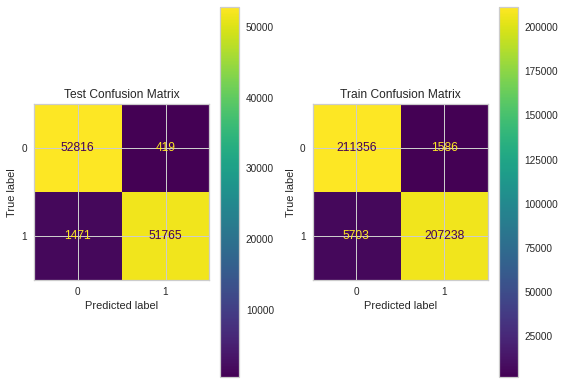

In [148]:
eval_metric(log_pipe_o, X_train_so, y_train_so, X_test_so, y_test_so)

***iv.  Plot Precision and Recall Curve***


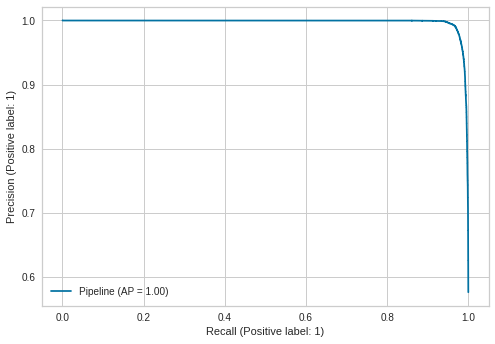

In [149]:
plot_precision_recall_curve(log_pipe, X_test_s, y_test_s);

*On dataframe more outliers were dropped.*

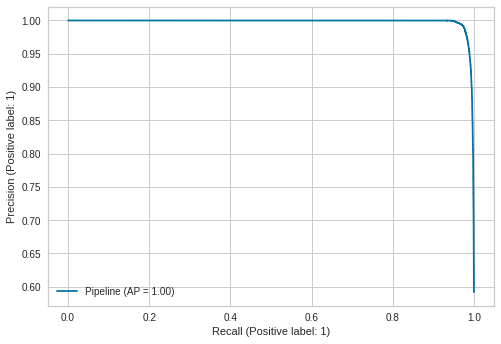

In [150]:
plot_precision_recall_curve(log_pipe_o, X_test_so, y_test_so);

***v. Apply StratifiedKFold***

In [151]:
stratified_cv(5, X_smote, y_smote, LogisticRegression())

1 of KFold 5
2 of KFold 5
3 of KFold 5
4 of KFold 5
5 of KFold 5


precision    recall        f1
0   0.991381  0.966583  0.978825
1   0.989933  0.966953  0.978308
2   0.991433  0.966352  0.978732
3   0.990621  0.967712  0.979033
4   0.990655  0.965594  0.977964

In [152]:
log_smote = pd.DataFrame(stratified_cv(5, X_smote, y_smote, LogisticRegression()).mean(), 
                         columns=["Log_smote"])
log_smote

1 of KFold 5
2 of KFold 5
3 of KFold 5
4 of KFold 5
5 of KFold 5


Log_smote
precision   0.990805
recall      0.966639
f1          0.978572

*On dataframe more outliers were dropped.*

In [153]:
log_smote_o = pd.DataFrame(stratified_cv(5, X_smote_o, y_smote_o, LogisticRegression()).mean(), 
                           columns=["Log_smote_o"])
log_smote_o

1 of KFold 5
2 of KFold 5
3 of KFold 5
4 of KFold 5
5 of KFold 5


Log_smote_o
precision     0.992375
recall        0.972958
f1            0.982570

In [154]:
results_smote_all = pd.concat([log_smote,log_smote_o],axis=1)
results_smote_all

Log_smote  Log_smote_o
precision   0.990805     0.992375
recall      0.966639     0.972958
f1          0.978572     0.982570

### Apply Smote only train data (Logistic Regression)

*On dataframe only extreme outliers were dropped.*

In [155]:
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train)

In [156]:
log_train_smote = Pipeline(steps =[ ('scale',StandardScaler()), ("log",LogisticRegression()) ])
log_train_smote.fit(X_train_sm,y_train_sm)

Pipeline(steps=[('scale', StandardScaler()), ('log', LogisticRegression())])

Test_Set
--------------------------------------
Confusion_matrix: 
[[56164   483]
 [   12    83]]
classification_report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56647
           1       0.15      0.87      0.25        95

    accuracy                           0.99     56742
   macro avg       0.57      0.93      0.62     56742
weighted avg       1.00      0.99      0.99     56742


Train_Set
--------------------------------------
Confusion_matrix:
[[224692   1894]
 [  8071 218515]]
classification_report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    226586
           1       0.99      0.96      0.98    226586

    accuracy                           0.98    453172
   macro avg       0.98      0.98      0.98    453172
weighted avg       0.98      0.98      0.98    453172



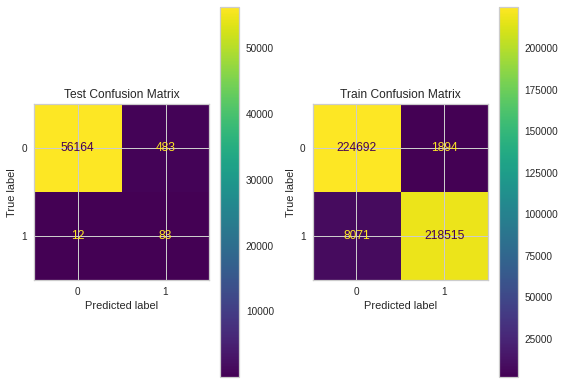

In [157]:
eval_metric(log_train_smote, X_train_sm, y_train_sm, X_test, y_test)

In [158]:
log_tr_smote = metric_df(log_train_smote, X_train_sm, y_train_sm, X_test, y_test, "log_tr_smote")
log_tr_smote

log_tr_smote
precision      0.146643
recall         0.873684
f1             0.251135

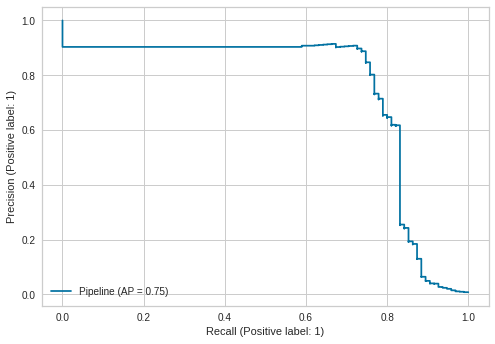

In [159]:
plot_precision_recall_curve(log_train_smote, X_test, y_test);

*On dataframe more outliers were dropped.*

In [160]:
oversample = SMOTE()
X_train_smo, y_train_smo = oversample.fit_resample(X_train_o, y_train_o)

In [161]:
log_train_smote_o = Pipeline(steps =[ ('scale',StandardScaler()), ("log",LogisticRegression()) ])
log_train_smote_o.fit(X_train_smo,y_train_smo)

Pipeline(steps=[('scale', StandardScaler()), ('log', LogisticRegression())])

Test_Set
--------------------------------------
Confusion_matrix: 
[[55938   709]
 [   12    83]]
classification_report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56647
           1       0.10      0.87      0.19        95

    accuracy                           0.99     56742
   macro avg       0.55      0.93      0.59     56742
weighted avg       1.00      0.99      0.99     56742


Train_Set
--------------------------------------
Confusion_matrix:
[[211499   1443]
 [  5822 207120]]
classification_report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    212942
           1       0.99      0.97      0.98    212942

    accuracy                           0.98    425884
   macro avg       0.98      0.98      0.98    425884
weighted avg       0.98      0.98      0.98    425884



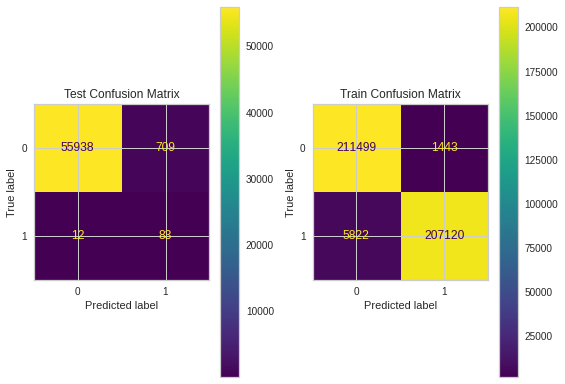

In [162]:
eval_metric(log_train_smote_o, X_train_smo, y_train_smo, X_test, y_test)

In [163]:
log_tr_smote_o = metric_df(log_train_smote_o, X_train_smo, y_train_smo, X_test, y_test, "log_tr_smote_o")
log_tr_smote_o

log_tr_smote_o
precision        0.104798
recall           0.873684
f1               0.187148

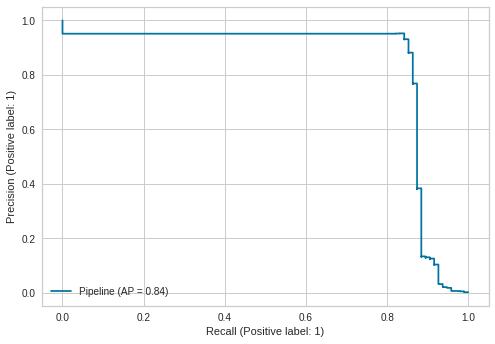

In [164]:
plot_precision_recall_curve(log_train_smote_o, X_test_o, y_test_o);

In [165]:
results_tr_smote = pd.concat([log_tr_smote,log_tr_smote_o],axis=1)
results_tr_smote

log_tr_smote  log_tr_smote_o
precision      0.146643        0.104798
recall         0.873684        0.873684
f1             0.251135        0.187148

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

*On dataframe only extreme outliers were dropped.*

In [302]:
rf_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("log",RandomForestClassifier(max_depth=10,
                                                                                      n_estimators=100)) ])

In [303]:
rf_pipe.fit(X_train_s,y_train_s)

Pipeline(steps=[('scale', StandardScaler()),
                ('log', RandomForestClassifier(max_depth=10))])

*On dataframe only extreme outliers were dropped.*

In [304]:
rf_pipe_o = Pipeline(steps =[ ('scale',StandardScaler()), 
                             ("rf",RandomForestClassifier(max_depth=10,
                                                          n_estimators=100)) ])
rf_pipe_o.fit(X_train_so,y_train_so)

Pipeline(steps=[('scale', StandardScaler()),
                ('rf', RandomForestClassifier(max_depth=10))])

***ii. Prediction and Model Evaluating***

Test_Set
--------------------------------------
Confusion_matrix: 
[[56558    89]
 [  939 55708]]
classification_report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     56647
           1       1.00      0.98      0.99     56647

    accuracy                           0.99    113294
   macro avg       0.99      0.99      0.99    113294
weighted avg       0.99      0.99      0.99    113294


Train_Set
--------------------------------------
Confusion_matrix:
[[226359    227]
 [  3764 222822]]
classification_report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    226586
           1       1.00      0.98      0.99    226586

    accuracy                           0.99    453172
   macro avg       0.99      0.99      0.99    453172
weighted avg       0.99      0.99      0.99    453172



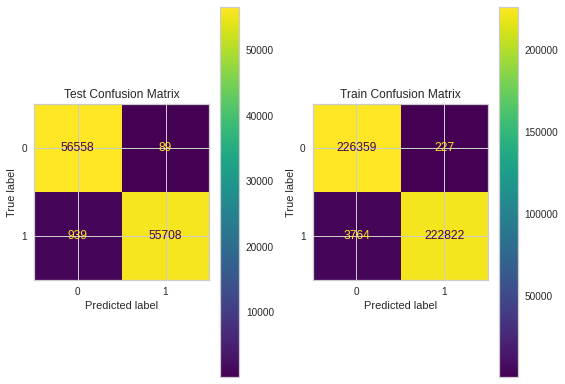

In [305]:
eval_metric(rf_pipe, X_train_s, y_train_s, X_test_s, y_test_s)

Test_Set
--------------------------------------
Confusion_matrix: 
[[53194    41]
 [ 1013 52223]]
classification_report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     53235
           1       1.00      0.98      0.99     53236

    accuracy                           0.99    106471
   macro avg       0.99      0.99      0.99    106471
weighted avg       0.99      0.99      0.99    106471


Train_Set
--------------------------------------
Confusion_matrix:
[[212814    128]
 [  3879 209062]]
classification_report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    212942
           1       1.00      0.98      0.99    212941

    accuracy                           0.99    425883
   macro avg       0.99      0.99      0.99    425883
weighted avg       0.99      0.99      0.99    425883



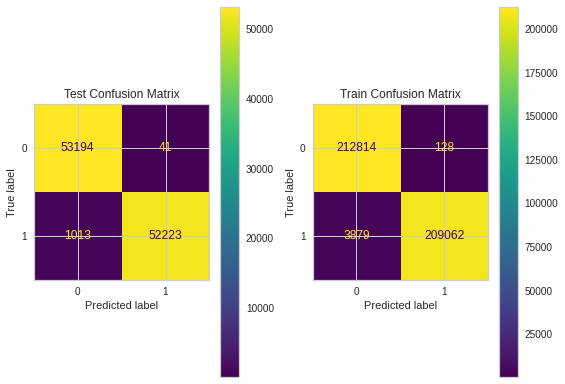

In [306]:
eval_metric(rf_pipe_o, X_train_so, y_train_so, X_test_so, y_test_so)

***iii. Plot Precision and Recall Curve***


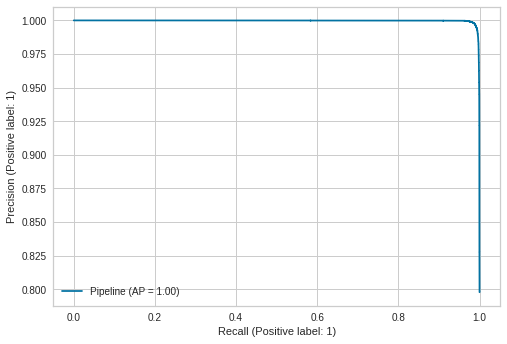

In [307]:
plot_precision_recall_curve(rf_pipe, X_test_s, y_test_s);

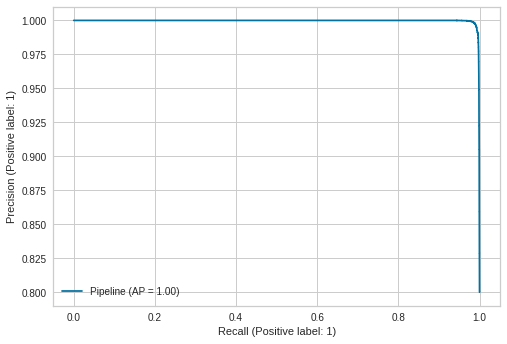

In [308]:
plot_precision_recall_curve(rf_pipe_o, X_test_so, y_test_so);

***iv. Apply StratifiedKFold***

In [309]:
rf_smote = pd.DataFrame(stratified_cv(5, X_smote, y_smote, 
                                      RandomForestClassifier(max_depth=10,n_estimators=100)).mean(), 
                         columns=["RF_smote"])
rf_smote

1 of KFold 5
2 of KFold 5
3 of KFold 5
4 of KFold 5
5 of KFold 5


RF_smote
precision  0.998744
recall     0.982527
f1         0.990569

In [310]:
rf_smote_o = pd.DataFrame(stratified_cv(5, X_smote_o, y_smote_o, 
                                      RandomForestClassifier(max_depth=10,n_estimators=100)).mean(), 
                         columns=["RF_smote_o"])
rf_smote_o

1 of KFold 5
2 of KFold 5
3 of KFold 5
4 of KFold 5
5 of KFold 5


RF_smote_o
precision    0.999231
recall       0.981794
f1           0.990436

In [311]:
results_smote_all = pd.concat([results_smote_all,rf_smote, rf_smote_o], axis=1)
results_smote_all

Log_smote  Log_smote_o  RF_smote  RF_smote_o
precision   0.990805     0.992375  0.998744    0.999231
recall      0.966639     0.972958  0.982527    0.981794
f1          0.978572     0.982570  0.990569    0.990436

### Apply smote only training data Random Forest

In [312]:
rf_train_smote = Pipeline(steps =[ ('scale',StandardScaler()), 
                                  ("rf",RandomForestClassifier(max_depth=8,
                                                               n_estimators=100,
                                                              n_jobs=-1)) ])
rf_train_smote.fit(X_train_sm,y_train_sm)

Pipeline(steps=[('scale', StandardScaler()),
                ('rf', RandomForestClassifier(max_depth=8, n_jobs=-1))])

Test_Set
--------------------------------------
Confusion_matrix: 
[[32597 24050]
 [    8    87]]
classification_report
              precision    recall  f1-score   support

           0       1.00      0.58      0.73     56647
           1       0.00      0.92      0.01        95

    accuracy                           0.58     56742
   macro avg       0.50      0.75      0.37     56742
weighted avg       1.00      0.58      0.73     56742


Train_Set
--------------------------------------
Confusion_matrix:
[[226076    510]
 [  6678 219908]]
classification_report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    226586
           1       1.00      0.97      0.98    226586

    accuracy                           0.98    453172
   macro avg       0.98      0.98      0.98    453172
weighted avg       0.98      0.98      0.98    453172



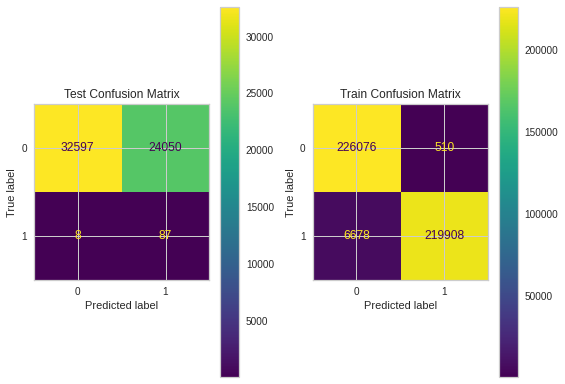

In [313]:
eval_metric(rf_train_smote, X_train_sm, y_train_sm, X_test, y_test)

In [314]:
rf_tr_smote = metric_df(rf_train_smote, X_train_sm, y_train_sm, X_test, y_test,"rf_tr_smote")
rf_tr_smote

rf_tr_smote
precision     0.003604
recall        0.915789
f1            0.007181

In [315]:
rf_train_smote_o = Pipeline(steps =[ ('scale',StandardScaler()),
                                    ("rf",RandomForestClassifier(max_depth=6,
                                                                 n_estimators=100, 
                                                                 n_jobs=-1))])
rf_train_smote_o.fit(X_train_smo,y_train_smo)

Pipeline(steps=[('scale', StandardScaler()),
                ('rf', RandomForestClassifier(max_depth=6, n_jobs=-1))])

Test_Set
--------------------------------------
Confusion_matrix: 
[[56347   300]
 [   12    83]]
classification_report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56647
           1       0.22      0.87      0.35        95

    accuracy                           0.99     56742
   macro avg       0.61      0.93      0.67     56742
weighted avg       1.00      0.99      1.00     56742


Train_Set
--------------------------------------
Confusion_matrix:
[[212326    616]
 [ 10331 202611]]
classification_report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    212942
           1       1.00      0.95      0.97    212942

    accuracy                           0.97    425884
   macro avg       0.98      0.97      0.97    425884
weighted avg       0.98      0.97      0.97    425884



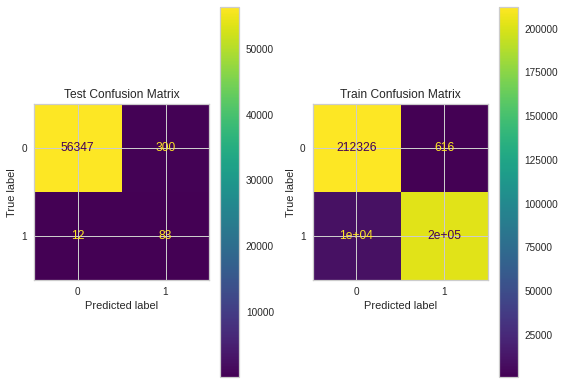

In [316]:
eval_metric(rf_train_smote_o, X_train_smo, y_train_smo, X_test, y_test)

In [317]:
rf_tr_smote_o = metric_df(rf_train_smote_o, X_train_smo, y_train_smo, X_test, y_test, "rf_tr_smote_o")
rf_tr_smote_o

rf_tr_smote_o
precision       0.216710
recall          0.873684
f1              0.347280

In [318]:
results_tr_smote = pd.concat([results_tr_smote,rf_tr_smote, rf_tr_smote_o],axis=1)
results_tr_smote

log_tr_smote  log_tr_smote_o  xgb_tr_smote  lgb_tr_smote  \
precision      0.146643        0.104798      0.427807      0.169421   
recall         0.873684        0.873684      0.842105      0.863158   
f1             0.251135        0.187148      0.567376      0.283247   

           cat_tr_smote  rf_tr_smote  rf_tr_smote_o  
precision      0.379310     0.003604       0.216710  
recall         0.810526     0.915789       0.873684  
f1             0.516779     0.007181       0.347280

### Random Forest without Smote

*On dataframe only extreme outliers were dropped.*

In [319]:
rf_model = RandomForestClassifier(max_depth=7, 
                                 n_estimators=100,
                                 n_jobs=-1, 
                                 class_weight= "balanced")
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1)

Test_Set
--------------------------------------
Confusion_matrix: 
[[56604    43]
 [   16    79]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56647
           1       0.65      0.83      0.73        95

    accuracy                           1.00     56742
   macro avg       0.82      0.92      0.86     56742
weighted avg       1.00      1.00      1.00     56742


Train_Set
--------------------------------------
Confusion_matrix:
[[226413    173]
 [    29    349]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226586
           1       0.67      0.92      0.78       378

    accuracy                           1.00    226964
   macro avg       0.83      0.96      0.89    226964
weighted avg       1.00      1.00      1.00    226964



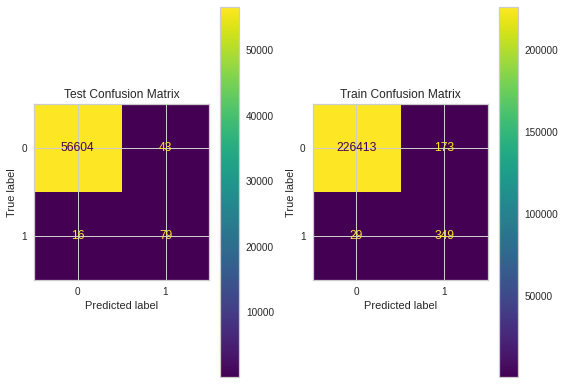

In [320]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

In [321]:
rf_df = pd.DataFrame(stratified_cv(5, X, y, 
                                    RandomForestClassifier(max_depth=7, 
                                                           n_estimators=100,
                                                           n_jobs=-1, 
                                                           class_weight= "balanced")).mean(), 
                           columns=["rf"])
rf_df

1 of KFold 5
2 of KFold 5
3 of KFold 5
4 of KFold 5
5 of KFold 5


rf
precision  0.696608
recall     0.837357
f1         0.757991

In [322]:
results_df = pd.concat([results_df,rf_df], axis=1)
results_df

Log       XGB       LGB       Cat        rf
precision  0.874427  0.931302  0.907946  0.941173  0.696608
recall     0.602732  0.778275  0.771937  0.780336  0.837357
f1         0.710850  0.845799  0.833211  0.852444  0.757991

*On dataframe more outliers were dropped.*

In [323]:
rf_model_o = RandomForestClassifier(max_depth=8, 
                                 n_estimators=100,
                                 n_jobs=-1, 
                                 class_weight= "balanced")
rf_model_o.fit(X_train_o, y_train_o)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_jobs=-1)

Test_Set
--------------------------------------
Confusion_matrix: 
[[53224    11]
 [   13    82]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53235
           1       0.88      0.86      0.87        95

    accuracy                           1.00     53330
   macro avg       0.94      0.93      0.94     53330
weighted avg       1.00      1.00      1.00     53330


Train_Set
--------------------------------------
Confusion_matrix:
[[212914     28]
 [    19    359]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212942
           1       0.93      0.95      0.94       378

    accuracy                           1.00    213320
   macro avg       0.96      0.97      0.97    213320
weighted avg       1.00      1.00      1.00    213320



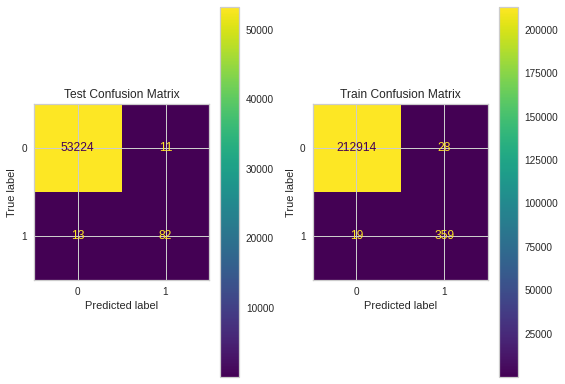

In [324]:
eval_metric(rf_model_o, X_train_o, y_train_o, X_test_o, y_test_o)

In [325]:
rf_df_o = pd.DataFrame(stratified_cv(5, X_o, y_o, 
                                    RandomForestClassifier(max_depth=7, 
                                                           n_estimators=100,
                                                           n_jobs=-1, 
                                                           class_weight= "balanced")).mean(), 
                           columns=["rf_o"])
rf_df_o

1 of KFold 5
2 of KFold 5
3 of KFold 5
4 of KFold 5
5 of KFold 5


rf_o
precision  0.876418
recall     0.832833
f1         0.851260

In [326]:
results_df_o = pd.concat([results_df_o,rf_df_o], axis=1)
results_df_o

Log_o     XGB_o     LGB_o     Cat_o      rf_o
precision  0.980383  0.983004  0.973130  0.982114  0.876418
recall     0.803247  0.815946  0.807548  0.803315  0.832833
f1         0.881088  0.890615  0.881140  0.882973  0.851260

### XGBoost

#### On dataframe only extreme outliers were dropped.

In [166]:
xgb_classifier = XGBClassifier(random_state=5, 
                               n_estimators=120, 
                               max_depth=2,
                               learning_rate=0.7,
                              n_jobs=-1)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(learning_rate=0.7, max_depth=2, n_estimators=120, n_jobs=-1,
              random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[56645     2]
 [   19    76]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56647
           1       0.97      0.80      0.88        95

    accuracy                           1.00     56742
   macro avg       0.99      0.90      0.94     56742
weighted avg       1.00      1.00      1.00     56742


Train_Set
--------------------------------------
Confusion_matrix:
[[226586      0]
 [    21    357]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226586
           1       1.00      0.94      0.97       378

    accuracy                           1.00    226964
   macro avg       1.00      0.97      0.99    226964
weighted avg       1.00      1.00      1.00    226964



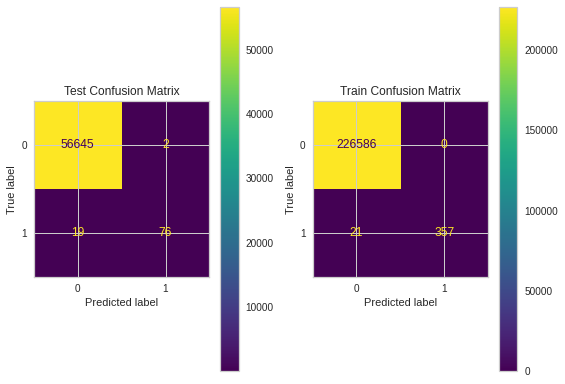

In [167]:
eval_metric(xgb_classifier, X_train, y_train, X_test, y_test)

In [168]:
xgb_df = pd.DataFrame(stratified_cv(5, X, y, 
                                         XGBClassifier(random_state=5, 
                                                       n_estimators=120,
                                                       max_depth=2,
                                                       learning_rate=0.7,
                                                       n_jobs=-1)).mean(), 
                           columns=["XGB"])
xgb_df

1 of KFold 5
2 of KFold 5
3 of KFold 5
4 of KFold 5
5 of KFold 5


XGB
precision  0.931302
recall     0.778275
f1         0.845799

In [169]:
results_df = pd.concat([results_df,xgb_df], axis=1)
results_df

Log       XGB
precision  0.874427  0.931302
recall     0.602732  0.778275
f1         0.710850  0.845799

#### On dataframe more outliers were dropped

In [170]:
xgb_classifier_o = XGBClassifier(random_state=5, 
                               n_estimators=120, 
                               max_depth=2,
                               learning_rate=0.7,
                              n_jobs=-1)
xgb_classifier_o.fit(X_train_o, y_train_o)

XGBClassifier(learning_rate=0.7, max_depth=2, n_estimators=120, n_jobs=-1,
              random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[53234     1]
 [   13    82]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53235
           1       0.99      0.86      0.92        95

    accuracy                           1.00     53330
   macro avg       0.99      0.93      0.96     53330
weighted avg       1.00      1.00      1.00     53330


Train_Set
--------------------------------------
Confusion_matrix:
[[212942      0]
 [     6    372]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212942
           1       1.00      0.98      0.99       378

    accuracy                           1.00    213320
   macro avg       1.00      0.99      1.00    213320
weighted avg       1.00      1.00      1.00    213320



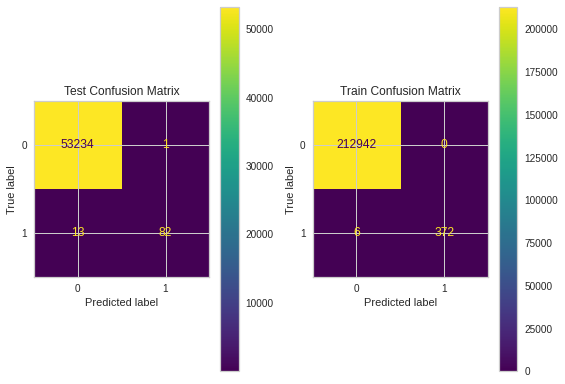

In [171]:
eval_metric(xgb_classifier_o, X_train_o, y_train_o, X_test_o, y_test_o)

In [172]:
xgb_df_o = pd.DataFrame(stratified_cv(5, X_o, y_o, 
                                         XGBClassifier(random_state=5, 
                                                       n_estimators=120,
                                                       max_depth=2,
                                                       learning_rate=0.7,
                                                       n_jobs=-1)).mean(), 
                           columns=["XGB_o"])
xgb_df_o

1 of KFold 5
2 of KFold 5
3 of KFold 5
4 of KFold 5
5 of KFold 5


XGB_o
precision  0.983004
recall     0.815946
f1         0.890615

In [173]:
results_df_o = pd.concat([results_df_o,xgb_df_o], axis=1)
results_df_o

Log_o     XGB_o
precision  0.980383  0.983004
recall     0.803247  0.815946
f1         0.881088  0.890615

#### Smote (Only train data)

In [174]:
xgb_train_smote = XGBClassifier(random_state=5, n_estimators=100,
                                max_depth=2,learning_rate=0.9,max_leaves=3, n_jobs=-1)
xgb_train_smote.fit(X_train_sm,y_train_sm)

XGBClassifier(learning_rate=0.9, max_depth=2, max_leaves=3, n_jobs=-1,
              random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[56540   107]
 [   15    80]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56647
           1       0.43      0.84      0.57        95

    accuracy                           1.00     56742
   macro avg       0.71      0.92      0.78     56742
weighted avg       1.00      1.00      1.00     56742


Train_Set
--------------------------------------
Confusion_matrix:
[[226260    326]
 [    86 226500]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226586
           1       1.00      1.00      1.00    226586

    accuracy                           1.00    453172
   macro avg       1.00      1.00      1.00    453172
weighted avg       1.00      1.00      1.00    453172



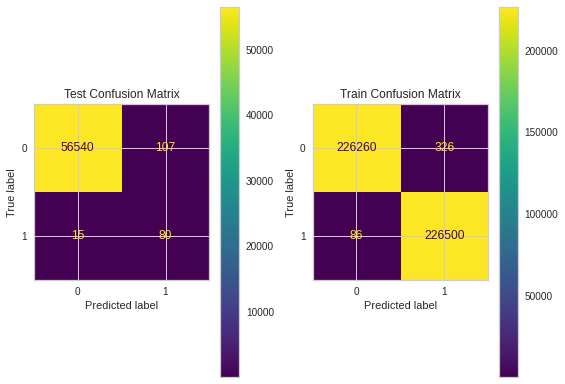

In [175]:
eval_metric(xgb_train_smote, X_train_sm, y_train_sm, X_test, y_test)

In [176]:
xgb_tr_smote = metric_df(xgb_train_smote, X_train_sm, y_train_sm, X_test, y_test,"xgb_tr_smote")
xgb_tr_smote

xgb_tr_smote
precision      0.427807
recall         0.842105
f1             0.567376

In [177]:
results_tr_smote = pd.concat([results_tr_smote,xgb_tr_smote], axis=1)
results_tr_smote

log_tr_smote  log_tr_smote_o  xgb_tr_smote
precision      0.146643        0.104798      0.427807
recall         0.873684        0.873684      0.842105
f1             0.251135        0.187148      0.567376

### LightGBM

#### On dataframe only extreme outliers were dropped.

In [178]:
lg_model = lgb.LGBMClassifier(random_state=5,
                              n_estimators=120,
                              num_leaves=31,
                            learning_rate=0.02)
lg_model.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.02, n_estimators=120, random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[56640     7]
 [   18    77]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56647
           1       0.92      0.81      0.86        95

    accuracy                           1.00     56742
   macro avg       0.96      0.91      0.93     56742
weighted avg       1.00      1.00      1.00     56742


Train_Set
--------------------------------------
Confusion_matrix:
[[226585      1]
 [    19    359]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226586
           1       1.00      0.95      0.97       378

    accuracy                           1.00    226964
   macro avg       1.00      0.97      0.99    226964
weighted avg       1.00      1.00      1.00    226964



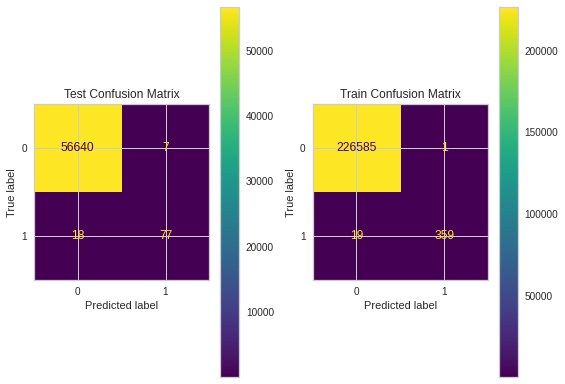

In [179]:
eval_metric(lg_model, X_train, y_train, X_test, y_test)

In [180]:
lgb_df = pd.DataFrame(stratified_cv(5, X, y,
                                    lgb.LGBMClassifier(random_state=5,
                                                       n_estimators=120,
                                                       num_leaves=31,
                                                       learning_rate=0.02)).mean(), 
                           columns=["LGB"])
lgb_df

1 of KFold 5
2 of KFold 5
3 of KFold 5
4 of KFold 5
5 of KFold 5


LGB
precision  0.907946
recall     0.771937
f1         0.833211

In [181]:
results_df = pd.concat([results_df,lgb_df], axis=1)
results_df

Log       XGB       LGB
precision  0.874427  0.931302  0.907946
recall     0.602732  0.778275  0.771937
f1         0.710850  0.845799  0.833211

#### On dataframe more outliers were dropped

In [182]:
lg_model_o = lgb.LGBMClassifier(random_state=5,
                              n_estimators=120,
                              num_leaves=31,
                            learning_rate=0.02)
lg_model_o.fit(X_train_o,y_train_o)

LGBMClassifier(learning_rate=0.02, n_estimators=120, random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[53233     2]
 [   14    81]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53235
           1       0.98      0.85      0.91        95

    accuracy                           1.00     53330
   macro avg       0.99      0.93      0.95     53330
weighted avg       1.00      1.00      1.00     53330


Train_Set
--------------------------------------
Confusion_matrix:
[[212941      1]
 [     9    369]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212942
           1       1.00      0.98      0.99       378

    accuracy                           1.00    213320
   macro avg       1.00      0.99      0.99    213320
weighted avg       1.00      1.00      1.00    213320



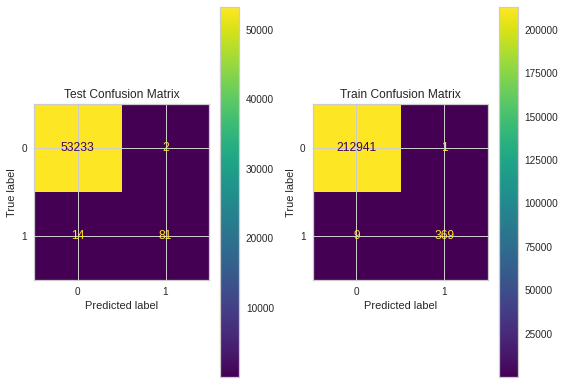

In [183]:
eval_metric(lg_model_o, X_train_o, y_train_o, X_test_o, y_test_o)

In [184]:
lgb_df_o = pd.DataFrame(stratified_cv(5, X_o, y_o,
                                    lgb.LGBMClassifier(random_state=5,
                                                       n_estimators=120,
                                                       num_leaves=31,
                                                       learning_rate=0.02)).mean(), 
                           columns=["LGB_o"])
lgb_df_o

1 of KFold 5
2 of KFold 5
3 of KFold 5
4 of KFold 5
5 of KFold 5


LGB_o
precision  0.973130
recall     0.807548
f1         0.881140

In [185]:
results_df_o = pd.concat([results_df_o,lgb_df_o], axis=1)
results_df_o

Log_o     XGB_o     LGB_o
precision  0.980383  0.983004  0.973130
recall     0.803247  0.815946  0.807548
f1         0.881088  0.890615  0.881140

#### Smote (Only train data)

In [186]:
lgb_train_smote = lgb.LGBMClassifier(random_state=5,
                              n_estimators=120,
                              num_leaves=31,
                            learning_rate=0.02)
lgb_train_smote.fit(X_train_sm,y_train_sm)

LGBMClassifier(learning_rate=0.02, n_estimators=120, random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[56245   402]
 [   13    82]]
classification_report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56647
           1       0.17      0.86      0.28        95

    accuracy                           0.99     56742
   macro avg       0.58      0.93      0.64     56742
weighted avg       1.00      0.99      1.00     56742


Train_Set
--------------------------------------
Confusion_matrix:
[[225179   1407]
 [  2556 224030]]
classification_report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    226586
           1       0.99      0.99      0.99    226586

    accuracy                           0.99    453172
   macro avg       0.99      0.99      0.99    453172
weighted avg       0.99      0.99      0.99    453172



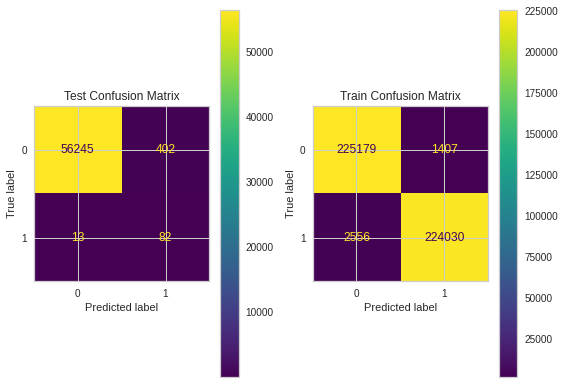

In [187]:
eval_metric(lgb_train_smote, X_train_sm, y_train_sm, X_test, y_test)

In [188]:
lgb_tr_smote = metric_df(lgb_train_smote, X_train_sm, y_train_sm, X_test, y_test,"lgb_tr_smote")
lgb_tr_smote

lgb_tr_smote
precision      0.169421
recall         0.863158
f1             0.283247

In [189]:
results_tr_smote = pd.concat([results_tr_smote,lgb_tr_smote], axis=1)
results_tr_smote

log_tr_smote  log_tr_smote_o  xgb_tr_smote  lgb_tr_smote
precision      0.146643        0.104798      0.427807      0.169421
recall         0.873684        0.873684      0.842105      0.863158
f1             0.251135        0.187148      0.567376      0.283247

### CatBoost

#### On dataframe only extreme outliers were dropped.

In [190]:
cat_model = CatBoostClassifier(iterations=130,
                           learning_rate=0.7,
                           eval_metric="Recall",
                           depth=3, verbose=False)
cat_model.fit(X_train,y_train)

Test_Set
--------------------------------------
Confusion_matrix: 
[[56644     3]
 [   19    76]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56647
           1       0.96      0.80      0.87        95

    accuracy                           1.00     56742
   macro avg       0.98      0.90      0.94     56742
weighted avg       1.00      1.00      1.00     56742


Train_Set
--------------------------------------
Confusion_matrix:
[[226586      0]
 [    37    341]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226586
           1       1.00      0.90      0.95       378

    accuracy                           1.00    226964
   macro avg       1.00      0.95      0.97    226964
weighted avg       1.00      1.00      1.00    226964



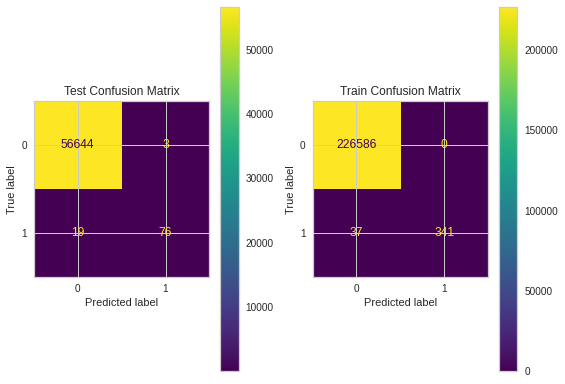

In [191]:
eval_metric(cat_model, X_train, y_train, X_test, y_test)

In [192]:
cat_df = pd.DataFrame(stratified_cv(5, X, y,CatBoostClassifier(iterations=130,
                                                               learning_rate=0.7,
                                                               eval_metric="Recall",
                                                               depth=4, verbose=False)).mean(), 
                           columns=["Cat"])
cat_df

1 of KFold 5
2 of KFold 5
3 of KFold 5
4 of KFold 5
5 of KFold 5


Cat
precision  0.941173
recall     0.780336
f1         0.852444

In [193]:
results_df = pd.concat([results_df,cat_df], axis=1)
results_df

Log       XGB       LGB       Cat
precision  0.874427  0.931302  0.907946  0.941173
recall     0.602732  0.778275  0.771937  0.780336
f1         0.710850  0.845799  0.833211  0.852444

#### On dataframe more outliers were dropped

In [194]:
cat_model_o = CatBoostClassifier(iterations=130,
                           learning_rate=0.7,
                           eval_metric="Recall",
                           depth=3, verbose=False)
cat_model_o.fit(X_train_o,y_train_o)

Test_Set
--------------------------------------
Confusion_matrix: 
[[53232     3]
 [   14    81]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53235
           1       0.96      0.85      0.91        95

    accuracy                           1.00     53330
   macro avg       0.98      0.93      0.95     53330
weighted avg       1.00      1.00      1.00     53330


Train_Set
--------------------------------------
Confusion_matrix:
[[212942      0]
 [    26    352]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212942
           1       1.00      0.93      0.96       378

    accuracy                           1.00    213320
   macro avg       1.00      0.97      0.98    213320
weighted avg       1.00      1.00      1.00    213320



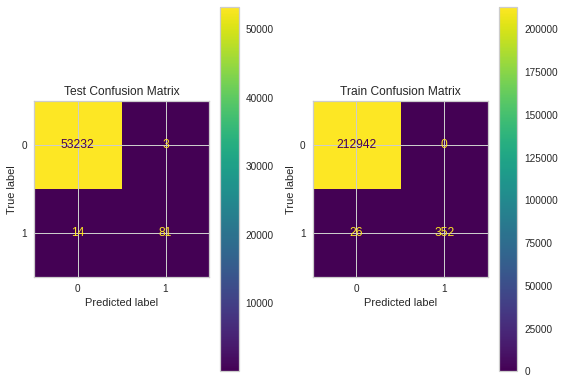

In [195]:
eval_metric(cat_model_o, X_train_o, y_train_o, X_test_o, y_test_o)

In [196]:
cat_df_o = pd.DataFrame(stratified_cv(5, X_o, y_o,CatBoostClassifier(iterations=130,
                                                               learning_rate=0.7,
                                                               eval_metric="Recall",
                                                               depth=4, verbose=False)).mean(), 
                           columns=["Cat_o"])
cat_df_o

1 of KFold 5
2 of KFold 5
3 of KFold 5
4 of KFold 5
5 of KFold 5


Cat_o
precision  0.982114
recall     0.803315
f1         0.882973

In [197]:
results_df_o = pd.concat([results_df_o,cat_df_o], axis=1)
results_df_o

Log_o     XGB_o     LGB_o     Cat_o
precision  0.980383  0.983004  0.973130  0.982114
recall     0.803247  0.815946  0.807548  0.803315
f1         0.881088  0.890615  0.881140  0.882973

#### Smote (Only train data)

In [198]:
cat_model_smote = CatBoostClassifier(iterations=130,
                           learning_rate=0.7,
                           eval_metric="Recall",
                           depth=3, verbose=False)
cat_model_smote.fit(X_train_sm,y_train_sm)

Test_Set
--------------------------------------
Confusion_matrix: 
[[56521   126]
 [   18    77]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56647
           1       0.38      0.81      0.52        95

    accuracy                           1.00     56742
   macro avg       0.69      0.90      0.76     56742
weighted avg       1.00      1.00      1.00     56742


Train_Set
--------------------------------------
Confusion_matrix:
[[226223    363]
 [   151 226435]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226586
           1       1.00      1.00      1.00    226586

    accuracy                           1.00    453172
   macro avg       1.00      1.00      1.00    453172
weighted avg       1.00      1.00      1.00    453172



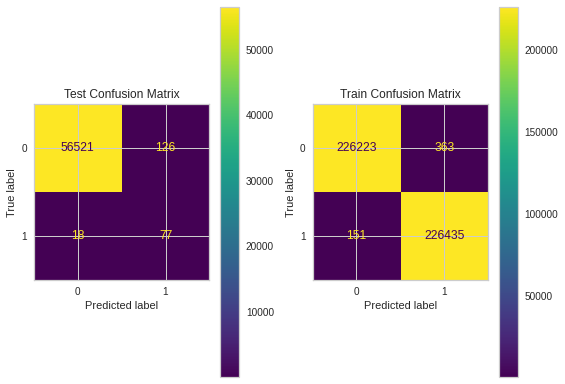

In [199]:
eval_metric(cat_model_smote, X_train_sm, y_train_sm, X_test, y_test)

In [200]:
cat_tr_smote = metric_df(cat_model_smote, X_train_sm, y_train_sm, X_test, y_test,"cat_tr_smote")
cat_tr_smote

cat_tr_smote
precision      0.379310
recall         0.810526
f1             0.516779

In [201]:
results_tr_smote = pd.concat([results_tr_smote,cat_tr_smote], axis=1)
results_tr_smote

log_tr_smote  log_tr_smote_o  xgb_tr_smote  lgb_tr_smote  \
precision      0.146643        0.104798      0.427807      0.169421   
recall         0.873684        0.873684      0.842105      0.863158   
f1             0.251135        0.187148      0.567376      0.283247   

           cat_tr_smote  
precision      0.379310  
recall         0.810526  
f1             0.516779

### GradBoost

#### On dataframe only extreme outliers were dropped.

In [ ]:
grad_model = GradientBoostingClassifier(random_state=5, 
                                             learning_rate=0.5,
                                             max_depth=3, 
                                             n_estimators=150, 
                                             subsample=1)
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=150, random_state=5,
                           subsample=1)

Test_Set
--------------------------------------
Confusion_matrix: 
[[56636    11]
 [   35    60]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56647
           1       0.85      0.63      0.72        95

    accuracy                           1.00     56742
   macro avg       0.92      0.82      0.86     56742
weighted avg       1.00      1.00      1.00     56742


Train_Set
--------------------------------------
Confusion_matrix:
[[226542     44]
 [   114    264]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226586
           1       0.86      0.70      0.77       378

    accuracy                           1.00    226964
   macro avg       0.93      0.85      0.88    226964
weighted avg       1.00      1.00      1.00    226964



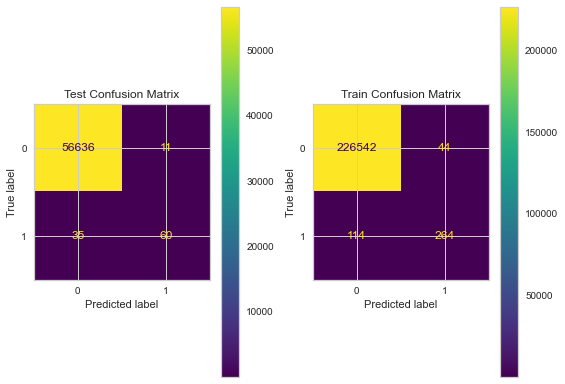

In [ ]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)

### SVM

In [ ]:
svm_model = SVC(random_state=5, class_weight= "balanced", C=50, gamma="scale", kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

SVC(C=10, class_weight='balanced', random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[56480   167]
 [   25    70]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56647
           1       0.30      0.74      0.42        95

    accuracy                           1.00     56742
   macro avg       0.65      0.87      0.71     56742
weighted avg       1.00      1.00      1.00     56742


Train_Set
--------------------------------------
Confusion_matrix:
[[226014    572]
 [     0    378]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226586
           1       0.40      1.00      0.57       378

    accuracy                           1.00    226964
   macro avg       0.70      1.00      0.78    226964
weighted avg       1.00      1.00      1.00    226964



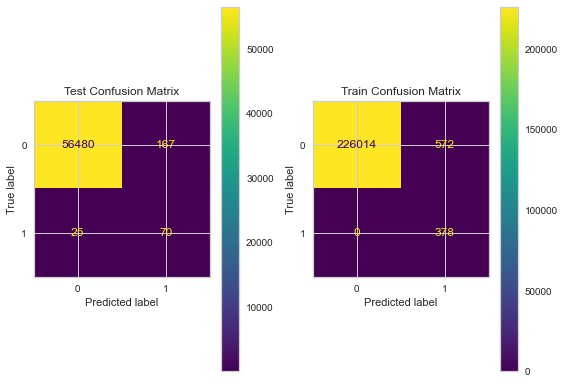

In [ ]:
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

### KNN

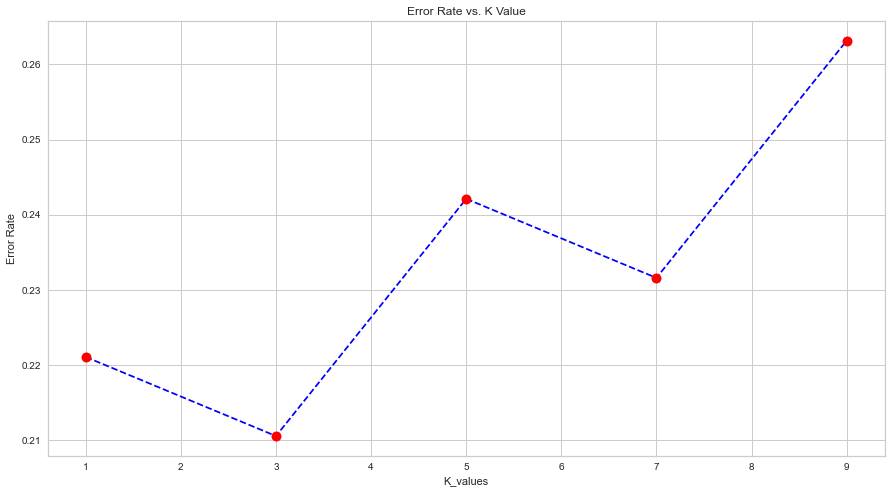

In [ ]:
test_error_rates = []

for k in range(1,11,2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    
    test_error = 1 - recall_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)

plt.figure(figsize=(15,8))
plt.plot(range(1,11,2), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled,y_train)
print('WITH K=3\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=3



In [ ]:
knn_df = metric_df(knn, X_train_scaled, y_train, X_test_scaled, y_test,"KNN")
knn_df

In [ ]:
results_df = pd.concat([results_df,cat_df], axis=1)
results_df

**SUMMARY OF MACHINE LEARNING**
* **Models were applied to 4 different data. These are:**
    * Dataframe with only extreme outliers were dropped.
    * Dataframe with more outliers were dropped.
    * Smote data which applied to all data.
    * Smote data which applied to only train data.
* **LogisticRegresssion, Random forest, XGBoost, LightGBM, CatBoost models were applied to all these data.**
* **SVM, KNN, and Grad models are not included in the outcome evaluation because they are too slow and their initial results are not very good.**
* **Results will be evaluated after deep learning part.**

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

In [205]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

**i. On dataframe only extreme outliers were dropped.**

In [206]:
model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train_scaled.shape[1]))
#model.add(Dropout(0.5))

model.add(Dense(16, activation = "relu"))
#model.add(Dropout(0.5))

model.add(Dense(8, activation = "relu"))
#model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid"))

opt = Adam()

In [207]:
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [229]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, 
                           patience =3 , restore_best_weights = True)

from sklearn.utils import class_weight 

class_weights = class_weight.compute_class_weight("balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

In [235]:
model.fit(x = X_train_scaled, y = y_train, batch_size = 32, epochs =15, 
          verbose = 1,validation_split = 0.15, callbacks = [early_stop])

Epoch 1/15
6029/6029 [==============================] - 26s 4ms/step - loss: 0.0029 - recall: 0.8349 - val_loss: 0.0059 - val_recall: 0.7843
Epoch 2/15
6029/6029 [==============================] - 22s 4ms/step - loss: 0.0020 - recall: 0.8287 - val_loss: 0.0035 - val_recall: 0.8235
Epoch 3/15
6029/6029 [==============================] - 22s 4ms/step - loss: 0.0017 - recall: 0.8196 - val_loss: 0.0035 - val_recall: 0.7843
Epoch 4/15
6029/6029 [==============================] - 23s 4ms/step - loss: 0.0016 - recall: 0.8287 - val_loss: 0.0028 - val_recall: 0.8431
Epoch 5/15
6029/6029 [==============================] - 24s 4ms/step - loss: 0.0015 - recall: 0.8287 - val_loss: 0.0032 - val_recall: 0.8039
Epoch 6/15
6029/6029 [==============================] - 22s 4ms/step - loss: 0.0014 - recall: 0.8410 - val_loss: 0.0032 - val_recall: 0.8235
Epoch 7/15
6029/6029 [==============================] - 29s 5ms/step - loss: 0.0013 - recall: 0.8349 - val_loss: 0.0041 - val_recall: 0.8039
Epoch 7: earl

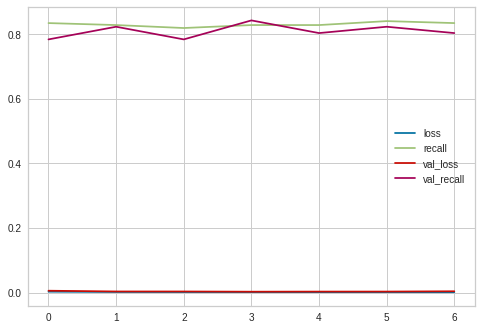

In [236]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [237]:
loss, recall = model.evaluate(X_test_scaled, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.0057367244735360146
recall :  0.800000011920929


In [251]:
y_pred = model.predict(X_test_scaled) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56632    15]
 [   19    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56647
           1       0.84      0.80      0.82        95

    accuracy                           1.00     56742
   macro avg       0.92      0.90      0.91     56742
weighted avg       1.00      1.00      1.00     56742



In [252]:
scores = {"Deep": {"precision" : precision_score(y_test, y_pred),
                 "recall" : recall_score(y_test, y_pred),                          
                 "f1" : f1_score(y_test,y_pred)}}
deep_df = pd.DataFrame(scores, index=["precision","recall","f1"])
deep_df

Deep
precision  0.835165
recall     0.800000
f1         0.817204

In [328]:
results_df = pd.concat([results_df,deep_df], axis=1)
results_df

Log       XGB       LGB       Cat        rf      Deep
precision  0.874427  0.931302  0.907946  0.941173  0.696608  0.835165
recall     0.602732  0.778275  0.771937  0.780336  0.837357  0.800000
f1         0.710850  0.845799  0.833211  0.852444  0.757991  0.817204

**ii. On dataframe more outliers were dropped.**

In [239]:
model_deep_o = Sequential()

model_deep_o.add(Dense(36, activation = "relu", input_dim = X_train_scaled_o.shape[1]))
#model.add(Dropout(0.5))

model_deep_o.add(Dense(18, activation = "relu"))
#model.add(Dropout(0.5))

model_deep_o.add(Dense(9, activation = "relu"))
#model.add(Dropout(0.5))

model_deep_o.add(Dense(1, activation = "sigmoid"))

opt = Adam()

In [240]:
model_deep_o.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [241]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience =2 , restore_best_weights = True)

In [242]:
model_deep_o.fit(x = X_train_scaled_o, y = y_train_o, batch_size = 32, epochs =15, 
          verbose = 1,validation_split = 0.15, callbacks = [early_stop])

Epoch 1/15
5667/5667 [==============================] - 22s 4ms/step - loss: 0.0081 - recall: 0.7094 - val_loss: 0.0027 - val_recall: 0.7931
Epoch 2/15
5667/5667 [==============================] - 36s 6ms/step - loss: 0.0027 - recall: 0.7906 - val_loss: 0.0026 - val_recall: 0.8103
Epoch 3/15
5667/5667 [==============================] - 38s 7ms/step - loss: 0.0024 - recall: 0.8031 - val_loss: 0.0026 - val_recall: 0.8103
Epoch 4/15
5667/5667 [==============================] - 22s 4ms/step - loss: 0.0022 - recall: 0.8094 - val_loss: 0.0025 - val_recall: 0.8448
Epoch 5/15
5667/5667 [==============================] - 31s 5ms/step - loss: 0.0021 - recall: 0.8125 - val_loss: 0.0027 - val_recall: 0.8276
Epoch 6/15
5667/5667 [==============================] - 39s 7ms/step - loss: 0.0020 - recall: 0.8250 - val_loss: 0.0026 - val_recall: 0.8276
Epoch 6: early stopping


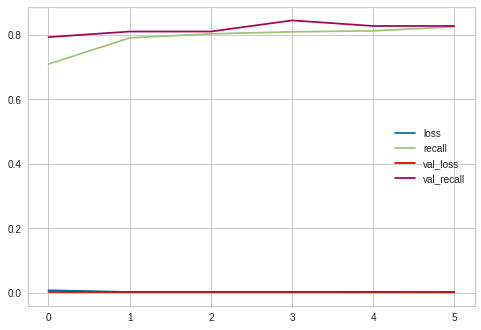

In [244]:
loss_df = pd.DataFrame(model_deep_o.history.history)
loss_df.plot()

In [245]:
loss, recall = model_deep_o.evaluate(X_test_scaled_o, y_test_o, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.0031607416458427906
recall :  0.8421052694320679


In [248]:
y_pred_o = model_deep_o.predict(X_test_scaled_o) > 0.5

print(confusion_matrix(y_test_o, y_pred))
print(classification_report(y_test_o, y_pred))

[[53231     4]
 [   15    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53235
           1       0.95      0.84      0.89        95

    accuracy                           1.00     53330
   macro avg       0.98      0.92      0.95     53330
weighted avg       1.00      1.00      1.00     53330



In [250]:
scores = {"Deep_o": {"precision" : precision_score(y_test_o, y_pred_o),
                 "recall" : recall_score(y_test_o, y_pred_o),                          
                 "f1" : f1_score(y_test_o,y_pred_o)}}
deep_df_o = pd.DataFrame(scores, index=["precision","recall","f1"])
deep_df_o

Deep_o
precision  0.952381
recall     0.842105
f1         0.893855

In [330]:
results_df_o = pd.concat([results_df_o,deep_df_o], axis=1)
results_df_o

Log_o     XGB_o     LGB_o     Cat_o      rf_o    Deep_o
precision  0.980383  0.983004  0.973130  0.982114  0.876418  0.952381
recall     0.803247  0.815946  0.807548  0.803315  0.832833  0.842105
f1         0.881088  0.890615  0.881140  0.882973  0.851260  0.893855

**iii. Smote all data**

In [266]:
scaler = StandardScaler()

In [267]:
X_train_s= scaler.fit_transform(X_train_s)
X_test_s = scaler.transform(X_test_s)

In [268]:
X_train_s.shape

(453172, 30)

In [293]:
model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train_s.shape[1]))
#model.add(Dropout(0.5))

model.add(Dense(18, activation = "relu"))
#model.add(Dropout(0.5))

model.add(Dense(9, activation = "relu"))
#model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid"))

opt = Adam()

In [294]:
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [295]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience =2 , restore_best_weights = True)

In [296]:
model.fit(x = X_train_s, y = y_train_s, batch_size = 32, epochs =2, 
          verbose = 1,validation_split = 0.15, callbacks = [early_stop])

Epoch 1/2
12038/12038 [==============================] - 49s 4ms/step - loss: 0.0317 - recall: 0.9860 - val_loss: 0.0139 - val_recall: 0.9992
Epoch 2/2
12038/12038 [==============================] - 46s 4ms/step - loss: 0.0092 - recall: 0.9979 - val_loss: 0.0057 - val_recall: 0.9991


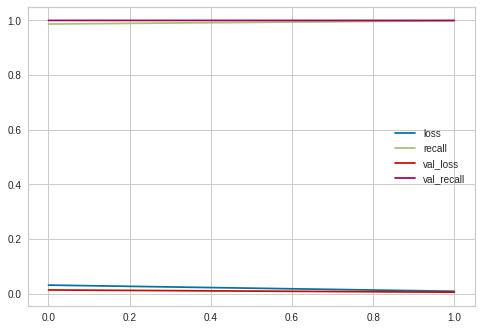

In [297]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [298]:
loss, recall = model.evaluate(X_test_s, y_test_s, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.005211495328694582
recall :  0.9991350173950195


In [299]:
y_pred = model.predict(X_test_s) > 0.5

print(confusion_matrix(y_test_s, y_pred))
print(classification_report(y_test_s, y_pred))

[[56542   105]
 [   49 56598]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56647
           1       1.00      1.00      1.00     56647

    accuracy                           1.00    113294
   macro avg       1.00      1.00      1.00    113294
weighted avg       1.00      1.00      1.00    113294



In [300]:
scores = {"Deep_sm_all": {"precision" : precision_score(y_test_s, y_pred),
                 "recall" : recall_score(y_test_s, y_pred),                          
                 "f1" : f1_score(y_test_s,y_pred)}}
deep_sm_all = pd.DataFrame(scores, index=["precision","recall","f1"])
deep_sm_all

Deep_sm_all
precision     0.998148
recall        0.999135
f1            0.998641

In [332]:
results_smote_all = pd.concat([results_smote_all,deep_sm_all],axis=1)
results_smote_all

Log_smote  Log_smote_o  RF_smote  RF_smote_o  Deep_sm_all
precision   0.990805     0.992375  0.998744    0.999231     0.998148
recall      0.966639     0.972958  0.982527    0.981794     0.999135
f1          0.978572     0.982570  0.990569    0.990436     0.998641

***iv. Smote only train data***

In [282]:
scaler = StandardScaler()
X_train_sm= scaler.fit_transform(X_train_sm)
X_test_sm=scaler.transform(X_test)

In [283]:
model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train_sm.shape[1]))
#model.add(Dropout(0.5))

model.add(Dense(18, activation = "relu"))
#model.add(Dropout(0.5))

model.add(Dense(9, activation = "relu"))
#model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid"))

opt = Adam()

In [284]:
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [285]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience =2 , restore_best_weights = True)

In [286]:
model.fit(x = X_train_sm, y = y_train_sm, batch_size = 32, epochs =2, 
          verbose = 1,validation_split = 0.15, callbacks = [early_stop])

Epoch 1/2
12038/12038 [==============================] - 62s 5ms/step - loss: 0.0320 - recall: 0.9841 - val_loss: 0.0097 - val_recall: 0.9977
Epoch 2/2
12038/12038 [==============================] - 50s 4ms/step - loss: 0.0088 - recall: 0.9974 - val_loss: 0.0038 - val_recall: 0.9993


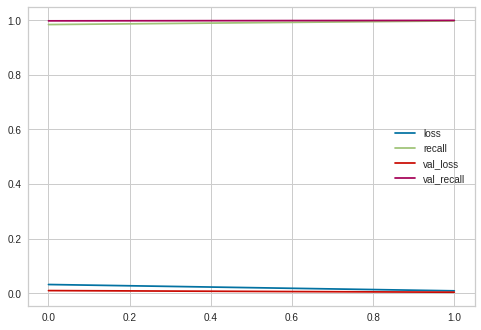

In [287]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [288]:
loss, recall = model.evaluate(X_test_sm, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.011743400245904922
recall :  0.800000011920929


In [289]:
y_pred = model.predict(X_test_sm) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56509   138]
 [   19    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56647
           1       0.36      0.80      0.49        95

    accuracy                           1.00     56742
   macro avg       0.68      0.90      0.75     56742
weighted avg       1.00      1.00      1.00     56742



In [292]:
scores = {"Deep_sm_all": {"precision" : precision_score(y_test, y_pred),
                 "recall" : recall_score(y_test, y_pred),                          
                 "f1" : f1_score(y_test,y_pred)}}
deep_tr_sm = pd.DataFrame(scores, index=["precision","recall","f1"])
deep_tr_sm

Deep_sm_all
precision     0.355140
recall        0.800000
f1            0.491909

In [338]:
results_tr_smote = pd.concat([results_tr_smote,deep_tr_sm],axis=1)
results_tr_smote

log_tr_smote  log_tr_smote_o  xgb_tr_smote  lgb_tr_smote  \
precision      0.146643        0.104798      0.427807      0.169421   
recall         0.873684        0.873684      0.842105      0.863158   
f1             0.251135        0.187148      0.567376      0.283247   

           cat_tr_smote  rf_tr_smote  rf_tr_smote_o  Deep_sm_all  
precision      0.379310     0.003604       0.216710     0.355140  
recall         0.810526     0.915789       0.873684     0.800000  
f1             0.516779     0.007181       0.347280     0.491909

### Model Evaluation

**Conclusion**
* **Evaluation based on the recall and F1 scores.**
* **There is a tradeoff between precison and recall in fraud analysis. There is a cost of fraud. But also there is a cost of false frauds (positives). (the cost of human labour for investigating the flagged transactions) In the article, "https://www.kaggle.com/code/robinteuwens/precision-vs-recall-optimizing-fraud-costs/notebook" it is said that "reducing the false negative rate (catching a fraud transaction) is 70 times as important as reducing the false positive rate." So according to this article recall is more important.**
* **Models applied to smote data (smote both applied to train and test) gave the best results. Recall, Precision and F1 scores of these models were almost 1.**
* **But these model are not seem very reliable. Because the scores of the models applied to smote data (only train data) was not good. Especially, precison scores of these models were very low. In many article, it is expressed that smote should be applied to only train data to avoid data leakage.**
* **For these reasons machine and deep learning models were applied directly to dataframes that we created.**
* **The models applied to the dataframe which was dropped more outliers (17056), gave better results that the dataframe which was dropped only extreme outliers (20). This was an expected result, as the rate of frauds is higher in outliers. However, if this is considered as directing the model, the results of the model may not be good on other data. But in any case, the recall result is expected to be good.** 
* **Scores of smote models are very high and close to each other. Best of them is deep learning model.**
* **The best scores also is deep learning model in without smote datas. But also scores of XGB and Catboost is good.**



**Scores of models applied to smote data (all data)**

In [347]:
results_smote_all.T

precision    recall        f1
Log_smote     0.990805  0.966639  0.978572
Log_smote_o   0.992375  0.972958  0.982570
RF_smote      0.998744  0.982527  0.990569
RF_smote_o    0.999231  0.981794  0.990436
Deep_sm_all   0.998148  0.999135  0.998641

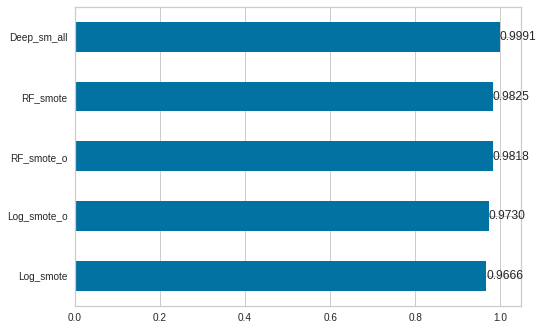

In [355]:
ax = results_smote_all.T["recall"].sort_values().plot.barh()
for p in ax.patches:
  width = p.get_width()                      
  ax.text(width, p.get_y() + p.get_height() / 2,'{:.4f}'.format(width), 
          ha = 'left', va = 'center') 

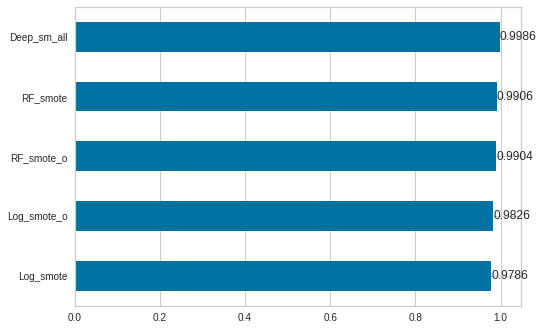

In [357]:
ax = results_smote_all.T["f1"].sort_values().plot.barh()
for p in ax.patches:
  width = p.get_width()                      
  ax.text(width, p.get_y() + p.get_height() / 2,'{:.4f}'.format(width), 
          ha = 'left', va = 'center') 

**Scores of models applied to smote data (only train data)**

In [346]:
results_tr_smote.T

precision    recall        f1
log_tr_smote     0.146643  0.873684  0.251135
log_tr_smote_o   0.104798  0.873684  0.187148
xgb_tr_smote     0.427807  0.842105  0.567376
lgb_tr_smote     0.169421  0.863158  0.283247
cat_tr_smote     0.379310  0.810526  0.516779
rf_tr_smote      0.003604  0.915789  0.007181
rf_tr_smote_o    0.216710  0.873684  0.347280
Deep_sm_all      0.355140  0.800000  0.491909

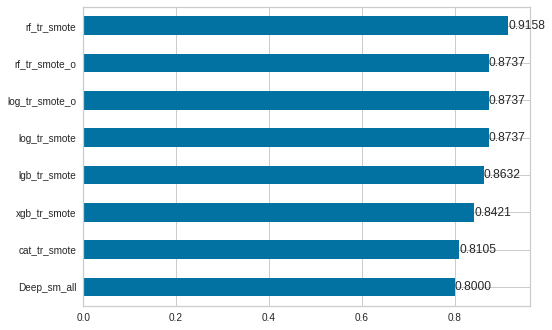

In [358]:
ax = results_tr_smote.T["recall"].sort_values().plot.barh()
for p in ax.patches:
  width = p.get_width()                      
  ax.text(width, p.get_y() + p.get_height() / 2,'{:.4f}'.format(width), 
          ha = 'left', va = 'center') 

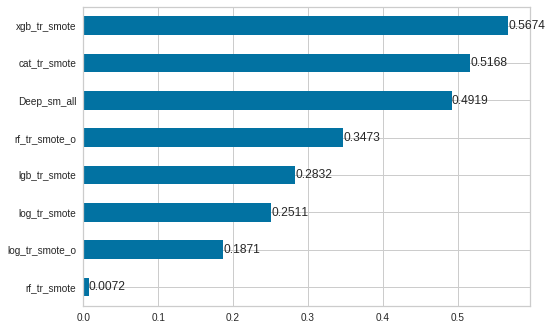

In [359]:
ax = results_tr_smote.T["f1"].sort_values().plot.barh()
for p in ax.patches:
  width = p.get_width()                      
  ax.text(width, p.get_y() + p.get_height() / 2,'{:.4f}'.format(width), 
          ha = 'left', va = 'center') 

**Scores of models applied to dataframe dropped only extreme outliers.**

In [349]:
results_df.T

precision    recall        f1
Log    0.874427  0.602732  0.710850
XGB    0.931302  0.778275  0.845799
LGB    0.907946  0.771937  0.833211
Cat    0.941173  0.780336  0.852444
rf     0.696608  0.837357  0.757991
Deep   0.835165  0.800000  0.817204

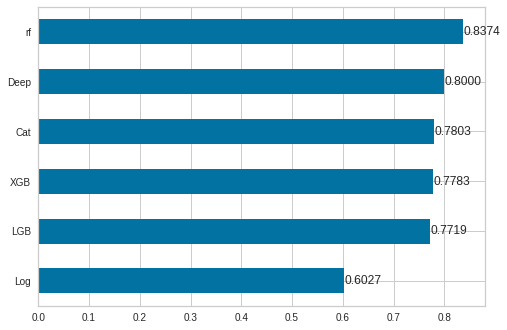

In [360]:
ax = results_df.T["recall"].sort_values().plot.barh()
for p in ax.patches:
  width = p.get_width()                      
  ax.text(width, p.get_y() + p.get_height() / 2,'{:.4f}'.format(width), 
          ha = 'left', va = 'center') 

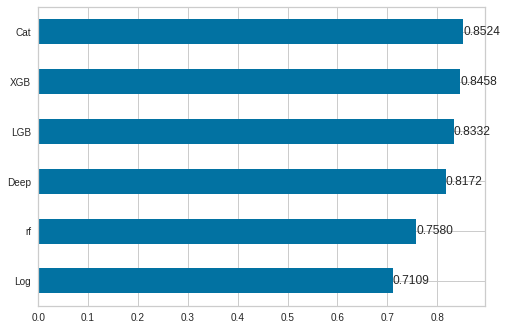

In [361]:
ax = results_df.T["f1"].sort_values().plot.barh()
for p in ax.patches:
  width = p.get_width()                      
  ax.text(width, p.get_y() + p.get_height() / 2,'{:.4f}'.format(width), 
          ha = 'left', va = 'center') 

**Scores of models applied to dataframe dropped more outliers.**



In [345]:
results_df_o

Log_o     XGB_o     LGB_o     Cat_o      rf_o    Deep_o
precision  0.980383  0.983004  0.973130  0.982114  0.876418  0.952381
recall     0.803247  0.815946  0.807548  0.803315  0.832833  0.842105
f1         0.881088  0.890615  0.881140  0.882973  0.851260  0.893855

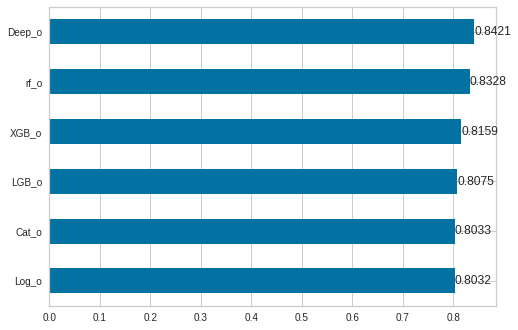

In [362]:
ax = results_df_o.T["recall"].sort_values().plot.barh()
for p in ax.patches:
  width = p.get_width()                      
  ax.text(width, p.get_y() + p.get_height() / 2,'{:.4f}'.format(width), 
          ha = 'left', va = 'center') 

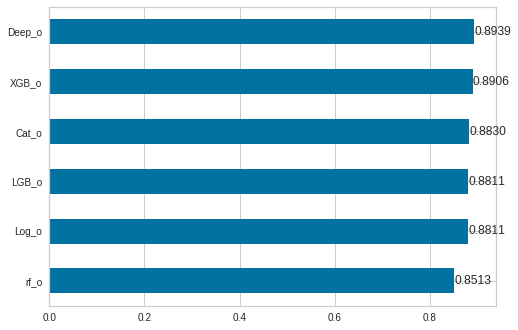

In [363]:
ax = results_df_o.T["f1"].sort_values().plot.barh()
for p in ax.patches:
  width = p.get_width()                      
  ax.text(width, p.get_y() + p.get_height() / 2,'{:.4f}'.format(width), 
          ha = 'left', va = 'center') 

**Scores without smote**

In [367]:
results_without_smote = pd.concat([results_df.T,results_df_o.T])
results_without_smote

precision    recall        f1
Log      0.874427  0.602732  0.710850
XGB      0.931302  0.778275  0.845799
LGB      0.907946  0.771937  0.833211
Cat      0.941173  0.780336  0.852444
rf       0.696608  0.837357  0.757991
Deep     0.835165  0.800000  0.817204
Log_o    0.980383  0.803247  0.881088
XGB_o    0.983004  0.815946  0.890615
LGB_o    0.973130  0.807548  0.881140
Cat_o    0.982114  0.803315  0.882973
rf_o     0.876418  0.832833  0.851260
Deep_o   0.952381  0.842105  0.893855

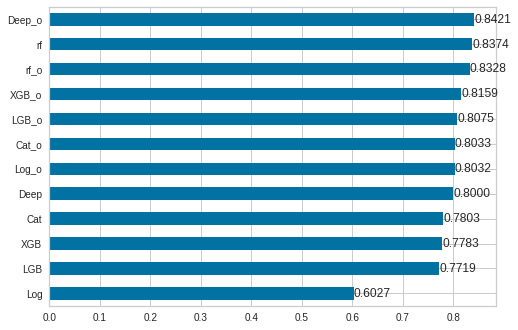

In [369]:
ax = results_without_smote["recall"].sort_values().plot.barh()
for p in ax.patches:
  width = p.get_width()                      
  ax.text(width, p.get_y() + p.get_height() / 2,'{:.4f}'.format(width), 
          ha = 'left', va = 'center') 

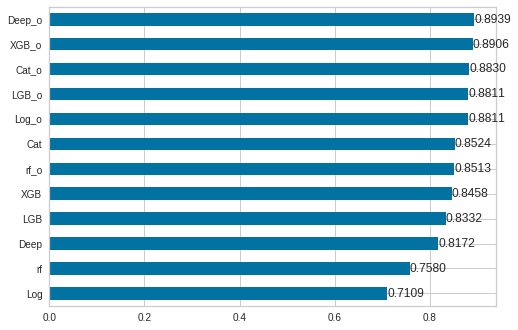

In [370]:
ax = results_without_smote["f1"].sort_values().plot.barh()
for p in ax.patches:
  width = p.get_width()                      
  ax.text(width, p.get_y() + p.get_height() / 2,'{:.4f}'.format(width), 
          ha = 'left', va = 'center') 

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Model as .pkl


In [202]:
xgb_final = XGBClassifier(random_state=5, n_estimators=120, max_depth=2,
                             learning_rate=0.7,n_jobs=-1)
xgb_final.fit(X_o,y_o)
# Saving the model
import pickle
pickle.dump(xgb_final, open('fraud_detection_xgb.pkl', 'wb'))

### Save and Export Variables as .pkl

In [203]:
log_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("log",LogisticRegression()) ])

In [204]:
log_pipe.fit(X_smote,y_smote)
pickle.dump(log_pipe, open('fraud_detection_log_smote.pkl', 'wb'))

### Save and Export Variables as .pkl

In [374]:
scaler2 = StandardScaler()

X_train_scaled_o = scaler2.fit_transform(X_train_o)
X_test_scaled_o = scaler2.transform(X_test_o)

pickle.dump(scaler2, open("scaler_fraud", 'wb'))

In [373]:
model_deep_o = Sequential()

model_deep_o.add(Dense(36, activation = "relu", input_dim = X_train_scaled_o.shape[1]))
#model.add(Dropout(0.5))

model_deep_o.add(Dense(18, activation = "relu"))
#model.add(Dropout(0.5))

model_deep_o.add(Dense(9, activation = "relu"))
#model.add(Dropout(0.5))

model_deep_o.add(Dense(1, activation = "sigmoid"))

opt = Adam()

model_deep_o.compile(optimizer = opt, loss = "binary_crossentropy", 
                     metrics = ["Recall"])

early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, 
                           patience =2 , restore_best_weights = True)

model_deep_o.fit(x = X_train_scaled_o, y = y_train_o, 
                 batch_size = 32, epochs =15, verbose = 1,
                 validation_data=(X_test_scaled_o, y_test_o), callbacks = [early_stop])

Epoch 1/15
6667/6667 [==============================] - 43s 6ms/step - loss: 0.0074 - recall: 0.5873 - val_loss: 0.0029 - val_recall: 0.8211
Epoch 2/15
6667/6667 [==============================] - 39s 6ms/step - loss: 0.0027 - recall: 0.7937 - val_loss: 0.0024 - val_recall: 0.8211
Epoch 3/15
6667/6667 [==============================] - 40s 6ms/step - loss: 0.0024 - recall: 0.8042 - val_loss: 0.0028 - val_recall: 0.8632
Epoch 4/15
6667/6667 [==============================] - 26s 4ms/step - loss: 0.0022 - recall: 0.8095 - val_loss: 0.0027 - val_recall: 0.8526
Epoch 4: early stopping


In [375]:
model_deep_o.save("deep_fraud.h5")

### Deployment

https://arifatih-fraud-detection-app-mikqbu.streamlitapp.com

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___